# Assignment 3. Introduction to Model Training


In [4]:
full_name = 'Ali Nikkhah'
student_id = '99102445'
print(full_name,student_id)

Ali Nikkhah 99102445


## 1 Propensity score matching




### 1.1 A naive analysis

What might a naive "researcher" conclude from this superficial analysis?



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


     id  treat  age  educ  black  hispan  married  nodegree  re74  re75  \
0  NSW1      1   37    11      1       0        1         1   0.0   0.0   
1  NSW2      1   22     9      0       1        0         1   0.0   0.0   
2  NSW3      1   30    12      1       0        0         0   0.0   0.0   
3  NSW4      1   27    11      1       0        0         1   0.0   0.0   
4  NSW5      1   33     8      1       0        0         1   0.0   0.0   

         re78  
0   9930.0460  
1   3595.8940  
2  24909.4500  
3   7506.1460  
4    289.7899  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        614 non-null    object 
 1   treat     614 non-null    int64  
 2   age       614 non-null    int64  
 3   educ      614 non-null    int64  
 4   black     614 non-null    int64  
 5   hispan    614 non-null    int64  
 6   married   614 non-null    int64

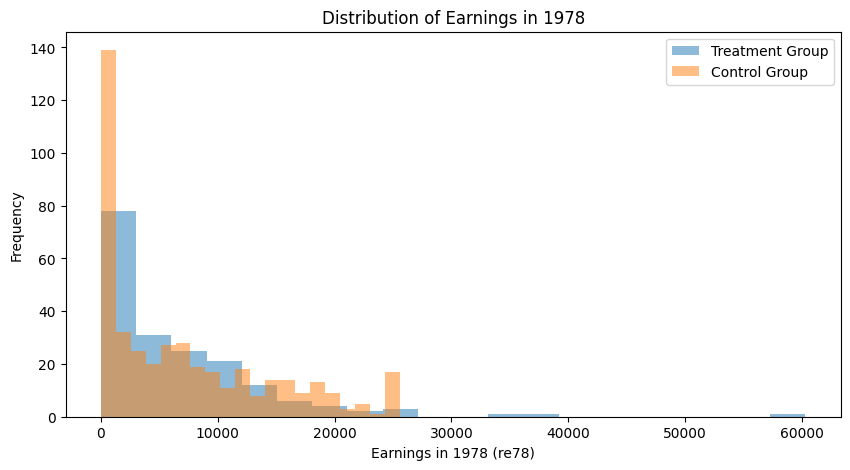

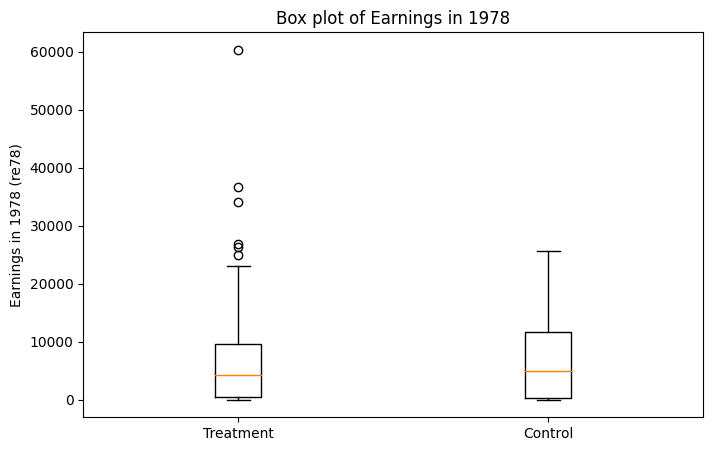

Treatment group statistics for re78:
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

Control group statistics for re78:
count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64


In [6]:
file_path = 'lalonde.csv'
data = pd.read_csv(file_path)
print(data.head())
print(data.info())
treatment = data[data['treat'] == 1]
control = data[data['treat'] == 0]
treatment_stats = treatment['re78'].describe()
control_stats = control['re78'].describe()
plt.figure(figsize=(10, 5))
plt.hist(treatment['re78'], bins=20, alpha=0.5, label='Treatment Group')
plt.hist(control['re78'], bins=20, alpha=0.5, label='Control Group')
plt.xlabel('Earnings in 1978 (re78)')
plt.ylabel('Frequency')
plt.title('Distribution of Earnings in 1978')
plt.legend()
plt.show()
# Box plot for comparison
plt.figure(figsize=(8, 5))
plt.boxplot([treatment['re78'], control['re78']], labels=['Treatment', 'Control'])
plt.ylabel('Earnings in 1978 (re78)')
plt.title('Box plot of Earnings in 1978')
plt.show()
# Print statistical measures
print("Treatment group statistics for re78:")
print(treatment_stats)
print("\nControl group statistics for re78:")
print(control_stats)



Treatment group statistics for re78:

\begin{array}{|c|c|}
\hline
\text{Statistic} & \text{Value} \\
\hline
\text{Count} & 185 \\
\text{Mean} & 6349.14 \\
\text{Standard Deviation} & 7867.40 \\
\text{Minimum} & 0 \\
\text{25th Percentile} & 485.23 \\
\text{50th Percentile (Median)} & 4232.31 \\
\text{75th Percentile} & 9642.99 \\
\text{Maximum} & 60307.93 \\
\hline
\end{array}


Control group statistics for re78:

\begin{array}{|c|c|}
\hline
\text{Statistic} & \text{Value} \\
\hline
\text{Count} & 429 \\
\text{Mean} & 6984.17 \\
\text{Standard Deviation} & 7294.16 \\
\text{Minimum} & 0 \\
\text{25th Percentile} & 220.18 \\
\text{50th Percentile (Median)} & 4975.51 \\
\text{75th Percentile} & 11688.82 \\
\text{Maximum} & 25564.67 \\
\hline
\end{array}



Based on the statistics provided for the earnings (re78) of the treatment and control groups:

- **Mean Earnings (re78) in 1978**:


   Treatment group mean: $6349.14


   Control group mean: $6984.17

- **Percentile Comparisons**:


  The median (50th percentile) earnings in 1978 were higher in the control group (4975.51) compared to the treatment group (4232.31).



  The 75th percentile earnings in 1978 were also higher in the control group (11688.82) compared to the treatment group (9642.99).

- **Observations**:

  - The mean earnings in 1978 for the control group (6984.17) were slightly higher than those for the treatment group (6349.14).
  - Both groups had similar minimum earnings (0) in 1978.
  - The treatment group had a wider spread of earnings, indicated by the larger standard deviation (7867.40) compared to the control group (7294.16).

- **Inference**:
  - Based on these statistics, there isn't a clear and definitive conclusion about the impact of the treatment on earnings in 1978.
  - While the mean earnings are slightly lower in the treatment group compared to the control group, other factors such as the median and percentile earnings do not distinctly support a direct or strong impact of the treatment program on earnings.
  - Further detailed analysis or statistical tests might be necessary to ascertain the effectiveness or impact of the job training program on earnings in 1978.

### 1.2 A closer look at the data



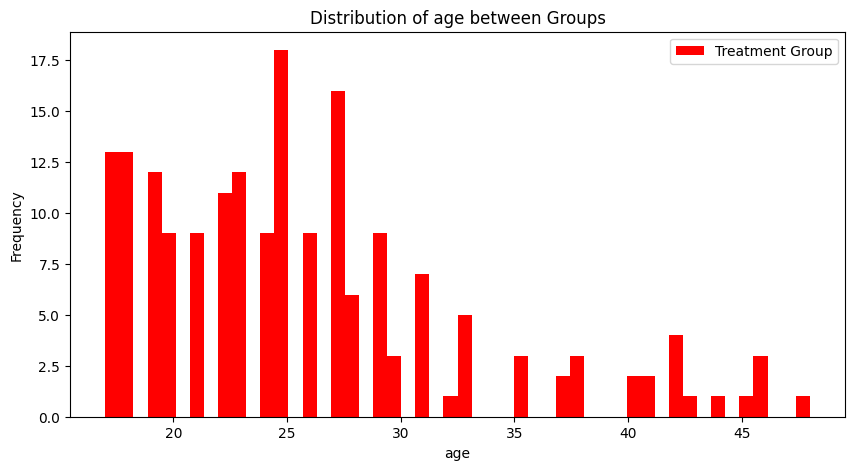

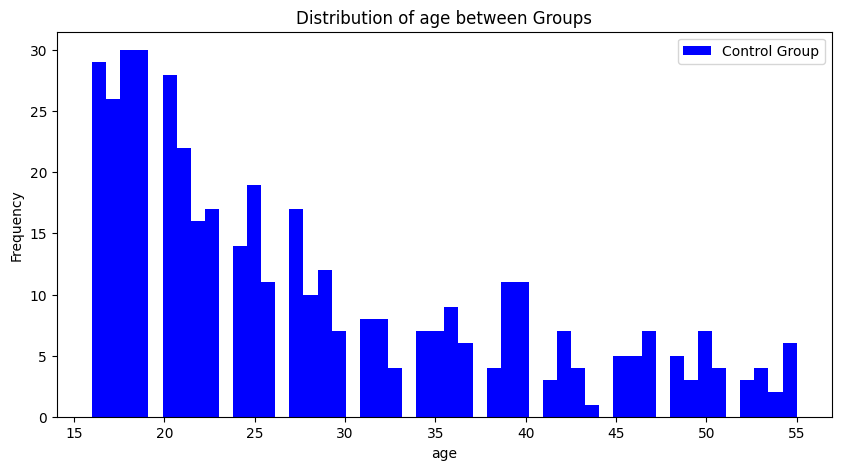


Summary statistics for age:
Treatment Group:
count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

Control Group:
count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64
------------------------------------------------------------------------------------------


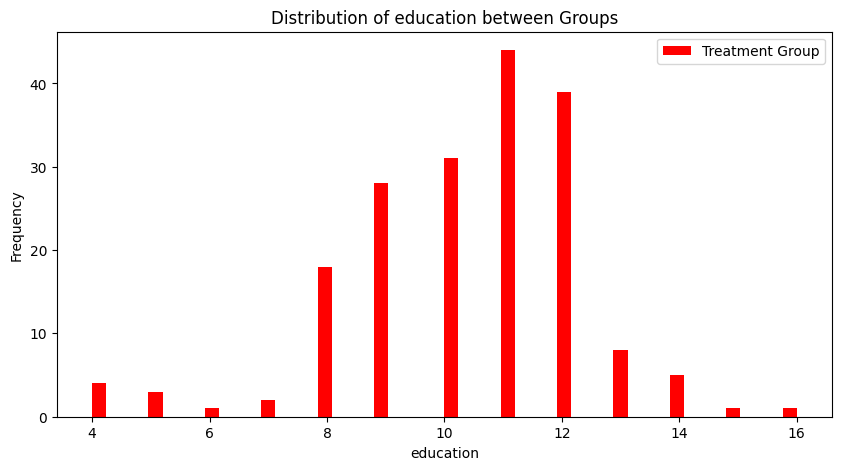

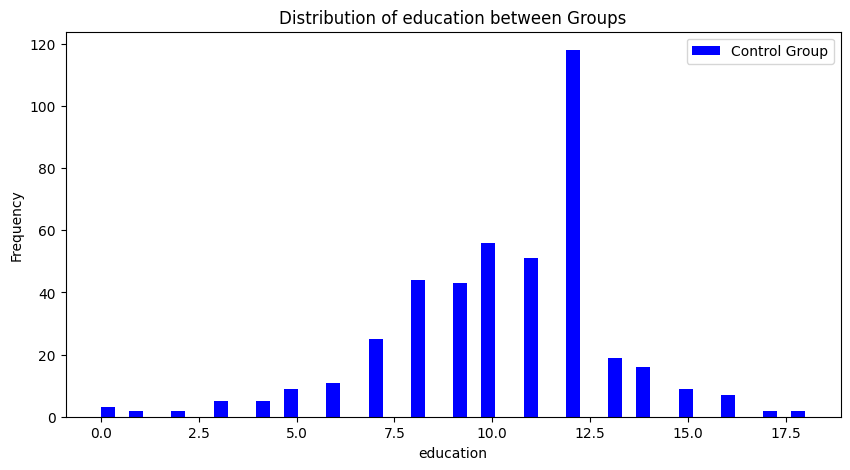


Summary statistics for educ:
Treatment Group:
count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

Control Group:
count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64
------------------------------------------------------------------------------------------


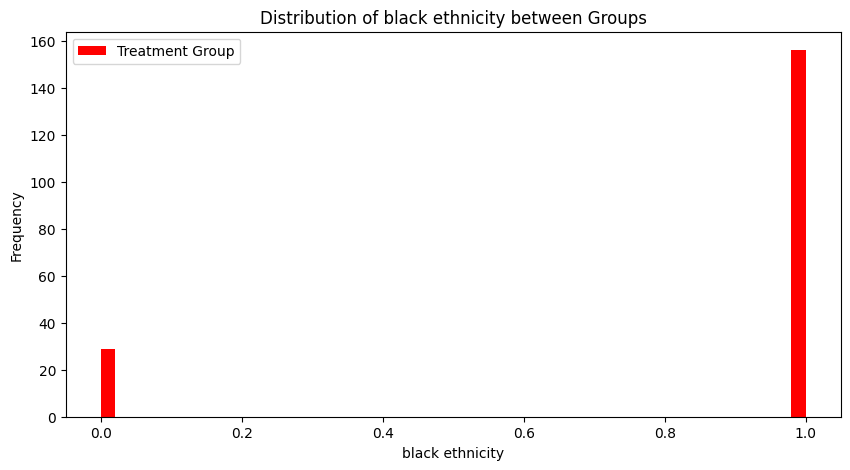

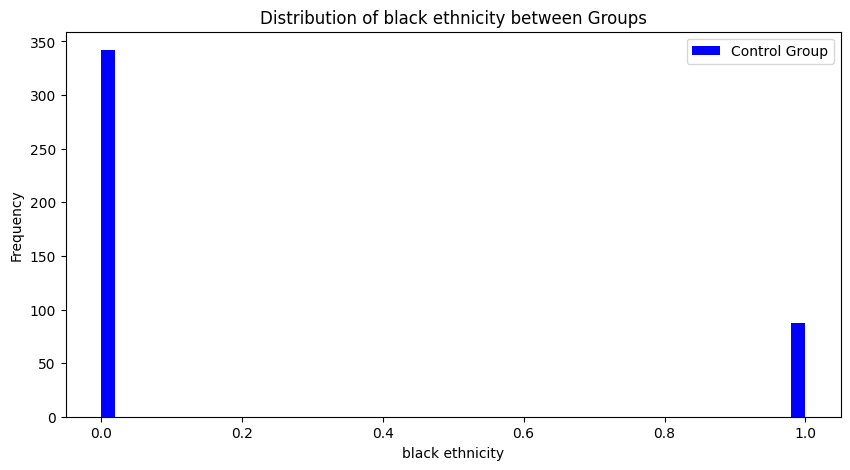


Summary statistics for black:
Treatment Group:
count    185.000000
mean       0.843243
std        0.364558
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: black, dtype: float64

Control Group:
count    429.000000
mean       0.202797
std        0.402552
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: black, dtype: float64
------------------------------------------------------------------------------------------


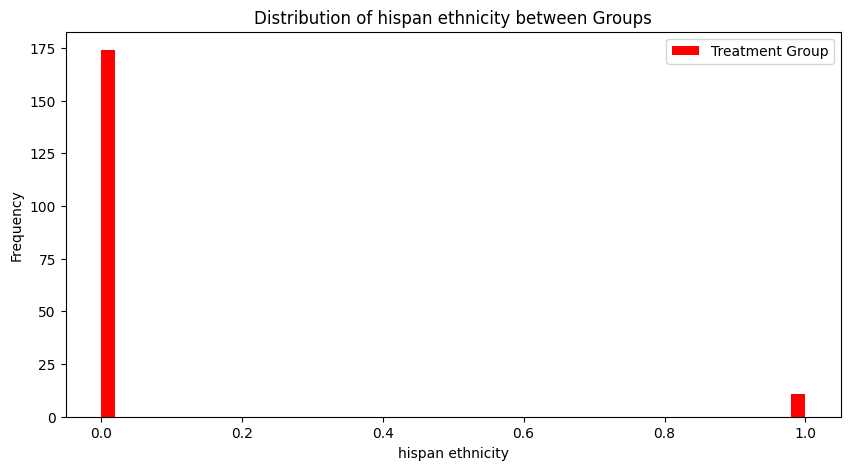

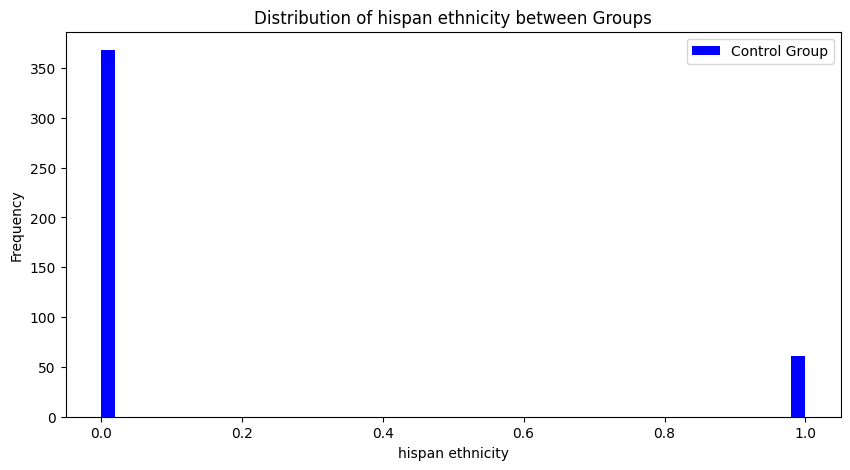


Summary statistics for hispan:
Treatment Group:
count    185.000000
mean       0.059459
std        0.237124
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hispan, dtype: float64

Control Group:
count    429.000000
mean       0.142191
std        0.349654
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hispan, dtype: float64
------------------------------------------------------------------------------------------


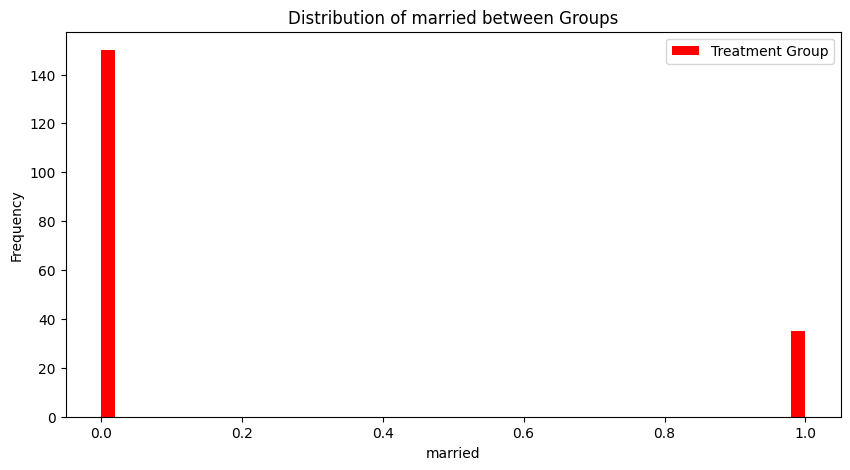

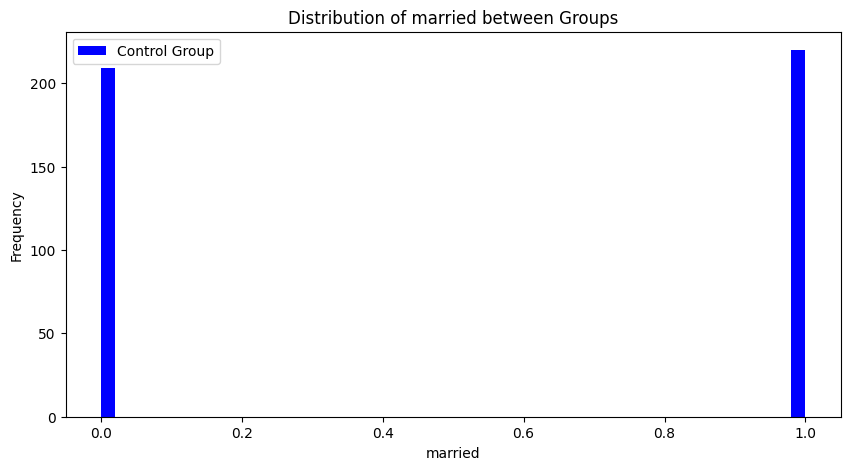


Summary statistics for married:
Treatment Group:
count    185.000000
mean       0.189189
std        0.392722
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: married, dtype: float64

Control Group:
count    429.000000
mean       0.512821
std        0.500419
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: married, dtype: float64
------------------------------------------------------------------------------------------


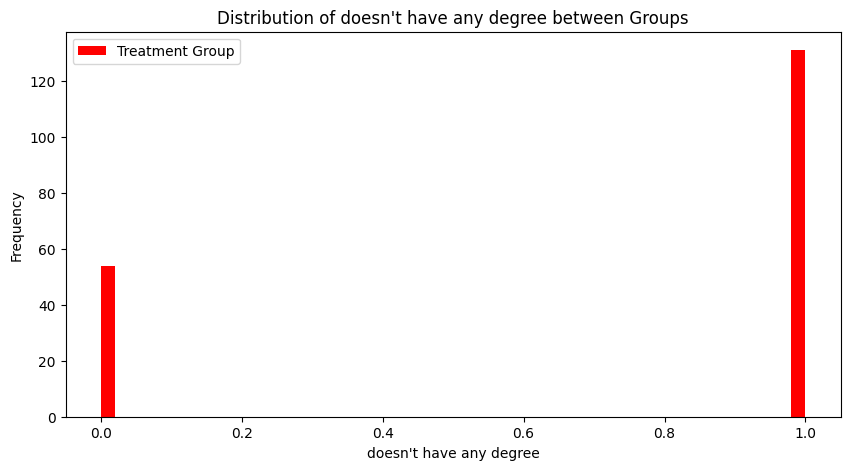

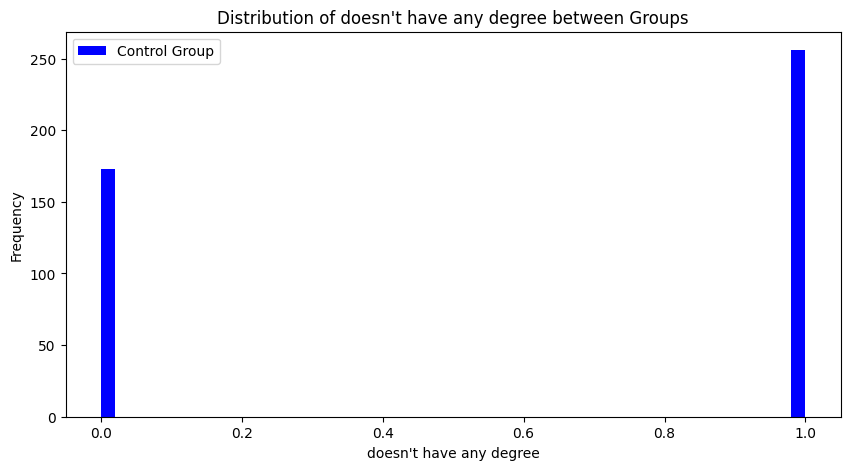


Summary statistics for nodegree:
Treatment Group:
count    185.000000
mean       0.708108
std        0.455867
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nodegree, dtype: float64

Control Group:
count    429.000000
mean       0.596737
std        0.491126
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nodegree, dtype: float64
------------------------------------------------------------------------------------------


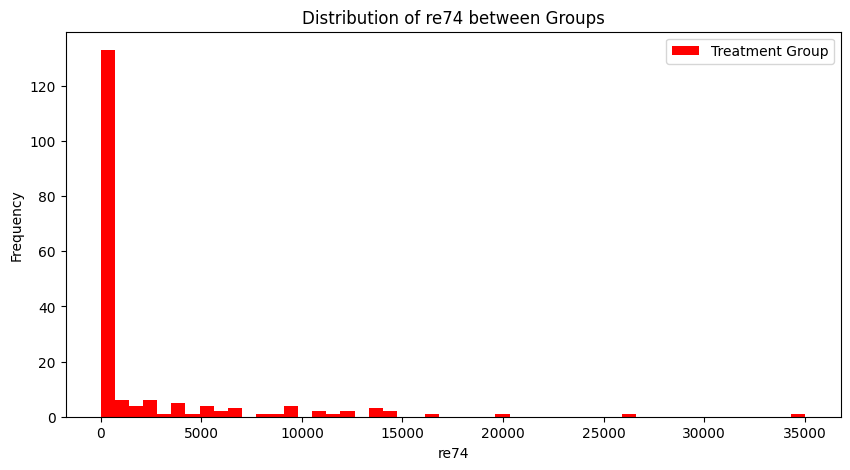

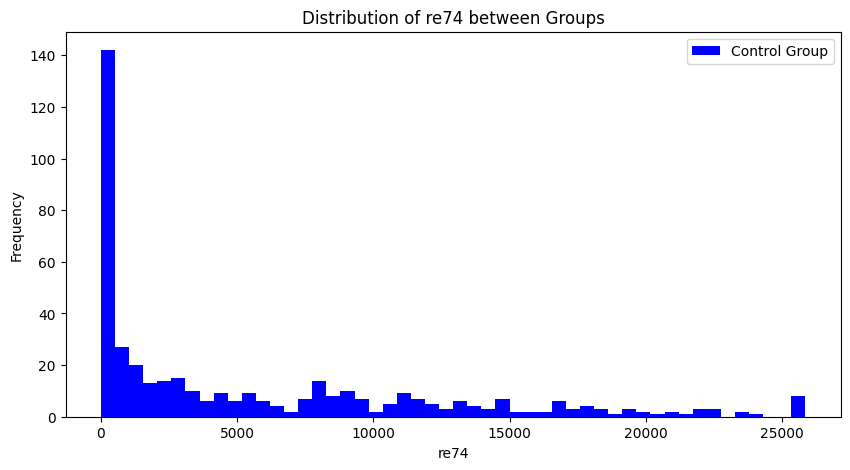


Summary statistics for re74:
Treatment Group:
count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64

Control Group:
count      429.000000
mean      5619.236506
std       6788.750796
min          0.000000
25%          0.000000
50%       2547.047000
75%       9277.128000
max      25862.320000
Name: re74, dtype: float64
------------------------------------------------------------------------------------------


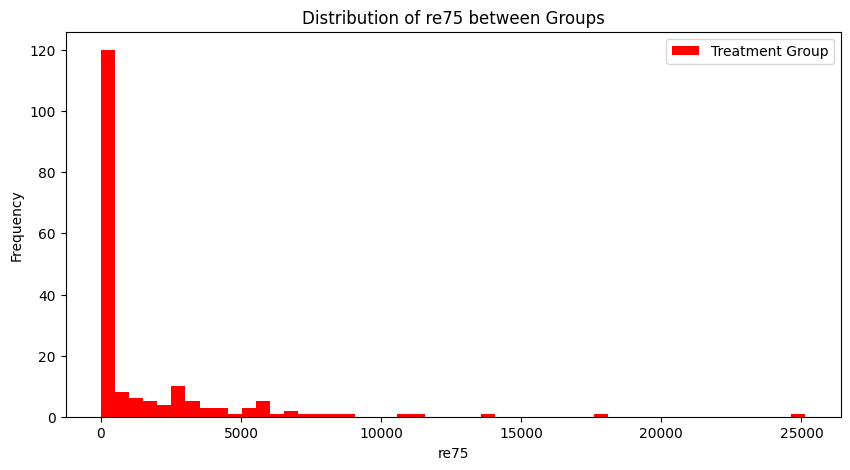

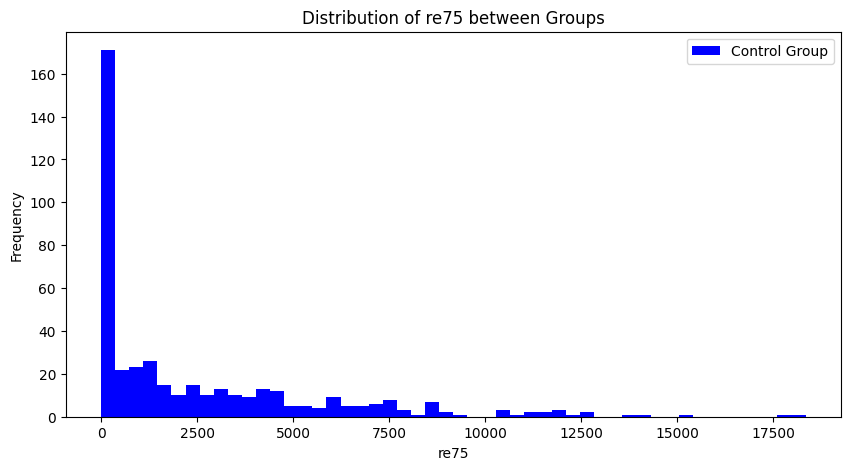


Summary statistics for re75:
Treatment Group:
count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64

Control Group:
count      429.000000
mean      2466.484443
std       3291.996183
min          0.000000
25%          0.000000
50%       1086.726000
75%       3881.419000
max      18347.230000
Name: re75, dtype: float64
------------------------------------------------------------------------------------------


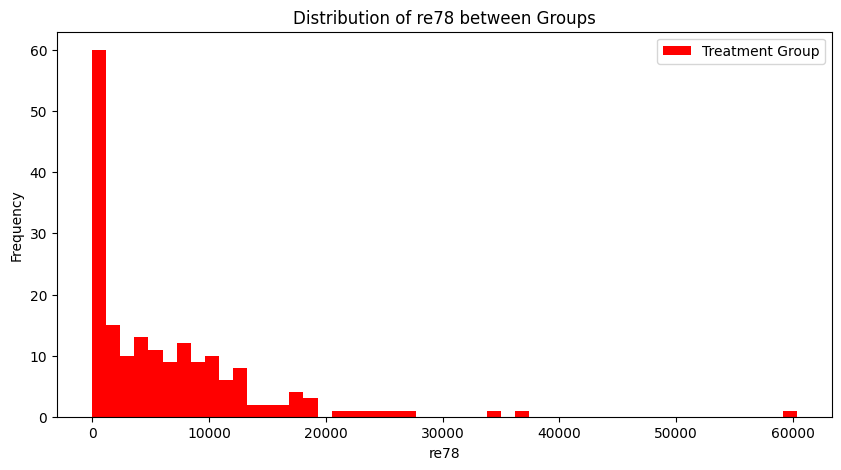

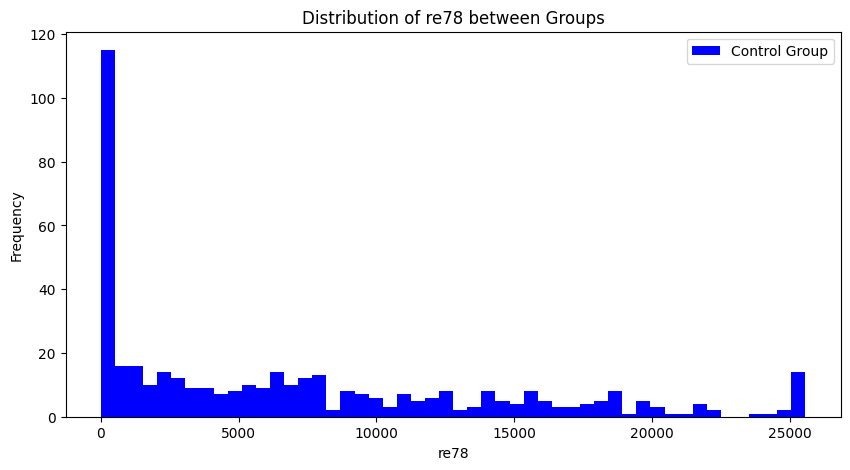


Summary statistics for re78:
Treatment Group:
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

Control Group:
count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64
------------------------------------------------------------------------------------------

Summary statistics for age:
Treatment Group:
count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

Control Group:
count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64
------

In [7]:

treatment_group = data[data['treat'] == 1]
control_group = data[data['treat'] == 0]

features = ['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75', 're78']
titles = ['age', 'education', 'black ethnicity', 'hispan ethnicity', 'married', "doesn't have any degree", 're74', 're75', 're78']
for i,feature in enumerate (features):


    plt.figure(figsize=(10, 5))
    plt.hist(treatment_group[feature], bins=50, alpha=1, label='Treatment Group',color='red')
    plt.xlabel(titles[i])
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {titles[i]} between Groups')
    plt.legend()
    plt.show()
    plt.figure(figsize=(10, 5))
    plt.hist(control_group[feature], bins=50, alpha=1, label='Control Group' ,color='blue')
    plt.xlabel(titles[i])
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {titles[i]} between Groups')
    plt.legend()
    plt.show()


    print(f"\nSummary statistics for {feature}:")
    print("Treatment Group:")
    print(treatment_group[feature].describe())
    print("\nControl Group:")
    print(control_group[feature].describe())
    print('---'*30)

for i,feature in enumerate (features):
    print(f"\nSummary statistics for {feature}:")
    print("Treatment Group:")
    print(treatment_group[feature].describe())
    print("\nControl Group:")
    print(control_group[feature].describe())
    print('---'*30)

### 1.3 logistic regression to estimate propensity scores for all points in the dataset

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum.

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.  
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.)


In [8]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
columns_for_model = ['age', 'educ', 're74', 're75', 'black', 'hispan', 'married', 'nodegree', 'treat']
data = pd.read_csv(file_path)
data_for_model=data[data['treat'] == 0]
data_for_model = data[columns_for_model]
X = data_for_model.drop('treat', axis=1)
y = data_for_model['treat']
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)
propensity_scores = logistic.predict_proba(X)[:, 1]
data['propensity_score'] = propensity_scores
propensity_score_treat=data[data['treat']==1]
propensity_score_control=data[data['treat']==0]
print(pd.DataFrame(data[['treat', 'propensity_score']]).describe())
print(pd.DataFrame(data[['treat', 'propensity_score']]).head())
print(propensity_score_control[['treat', 'propensity_score']].describe())
print(propensity_score_treat[['treat', 'propensity_score']].describe())

            treat  propensity_score
count  614.000000        614.000000
mean     0.301303          0.306490
std      0.459198          0.275959
min      0.000000          0.009155
25%      0.000000          0.069562
50%      0.000000          0.157023
75%      1.000000          0.660493
max      1.000000          0.781233
   treat  propensity_score
0      1          0.431932
1      1          0.134968
2      1          0.719753
3      1          0.658953
4      1          0.695676
       treat  propensity_score
count  429.0        429.000000
mean     0.0          0.197626
std      0.0          0.224691
min      0.0          0.009155
25%      0.0          0.056471
50%      0.0          0.106572
75%      0.0          0.174293
max      0.0          0.781233
       treat  propensity_score
count  185.0        185.000000
mean     1.0          0.558935
std      0.0          0.211103
min      1.0          0.041443
25%      1.0          0.464514
50%      1.0          0.665476
75%      1.0      

### 1.4 Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.  
(Hint: you may explore the `networkx` package in Python for predefined matching functions)  

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.  
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.  

After matching, you have as many treated as you have control subjects.  
Compare the outcomes (`re78`) between the two groups (treated and control).  

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects. What do you observe?  
Are you closer to being able to draw valid conclusions now than you were before?

### Bonus
Also, You can derive a mathematical model for this section. Your optimization problem should maximize the similarity between matched subjects, as captured by their propensity scores. In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

You don't need to implement this model and only need to write an optimization problem and proof theoretically that your model satisfies our goal.

In [15]:
import pandas as pd
import networkx as nx
df=pd.DataFrame(data)
re78_treated = df[df['treat'] == 1]['re78']
re78_control = df[df['treat'] == 0]['re78']
print("Mean re78 for Control Group:", re78_control.describe())
G = nx.Graph()
treated = df[df['treat'] == 1].index.tolist()
control = df[df['treat'] == 0].index.tolist()
G.add_nodes_from(treated, bipartite=0)
G.add_nodes_from(control, bipartite=1)
matched_pairs=[]
for i in treated:
    weights_captured = []
    for j in control:
        weight = abs(df.loc[i, 'propensity_score'] - df.loc[j, 'propensity_score'])
        weights_captured.append((j, weight))
    min_weight_node = min(weights_captured, key=lambda x: x[1])
    matched_pairs.append((min_weight_node[0],i,min_weight_node[1]))
print(matched_pairs)
for pair in matched_pairs:
    control_node, treated_node,w = pair
    df.at[control_node, 're78'] = df.at[treated_node, 're78']
re78_treated = df[df['treat'] == 1]['re78']
re78_control = df[df['treat'] == 0]['re78']

print("Mean re78 for Control Group after matching:", re78_control.describe())


Mean re78 for Control Group: count      429.000000
mean      7355.826623
std       7840.959559
min          0.000000
25%        648.722000
50%       5445.200000
75%      11600.150000
max      60307.930000
Name: re78, dtype: float64
[(281, 0, 0.0016644599108233127), (272, 1, 0.0005601238059964597), (560, 2, 3.8137570339324967e-05), (363, 3, 0.0012506404721740472), (539, 4, 0.0004774200205379664), (539, 5, 0.0015415279180722719), (375, 6, 0.00015104953805833432), (343, 7, 0.0015595787242380643), (461, 8, 0.0001452790921758762), (419, 9, 2.281767929679379e-05), (294, 10, 6.771530409632742e-05), (565, 11, 0.0), (565, 12, 0.00041974927242249827), (230, 13, 0.004215304681962018), (557, 14, 0.0004052025361800382), (437, 15, 0.0012743096260142694), (519, 16, 0.00026128506320843847), (596, 17, 0.0037141780774324618), (418, 18, 0.00015770144882543136), (440, 19, 0.00039622494130475694), (363, 20, 0.005271656629796118), (609, 21, 0.0003005284800500774), (366, 22, 6.728750283210849e-05), (363, 23,

Treated Group - 're78' Summary Statistics:
       treat         age        educ       black      hispan     married  \
count  185.0  185.000000  185.000000  185.000000  185.000000  185.000000   
mean     1.0   25.816216   10.345946    0.843243    0.059459    0.189189   
std      0.0    7.155019    2.010650    0.364558    0.237124    0.392722   
min      1.0   17.000000    4.000000    0.000000    0.000000    0.000000   
25%      1.0   20.000000    9.000000    1.000000    0.000000    0.000000   
50%      1.0   25.000000   11.000000    1.000000    0.000000    0.000000   
75%      1.0   29.000000   12.000000    1.000000    0.000000    0.000000   
max      1.0   48.000000   16.000000    1.000000    1.000000    1.000000   

         nodegree          re74          re75          re78  propensity_score  
count  185.000000    185.000000    185.000000    185.000000        185.000000  
mean     0.708108   2095.573689   1532.055314   6349.143530          0.558935  
std      0.455867   4886.620353 

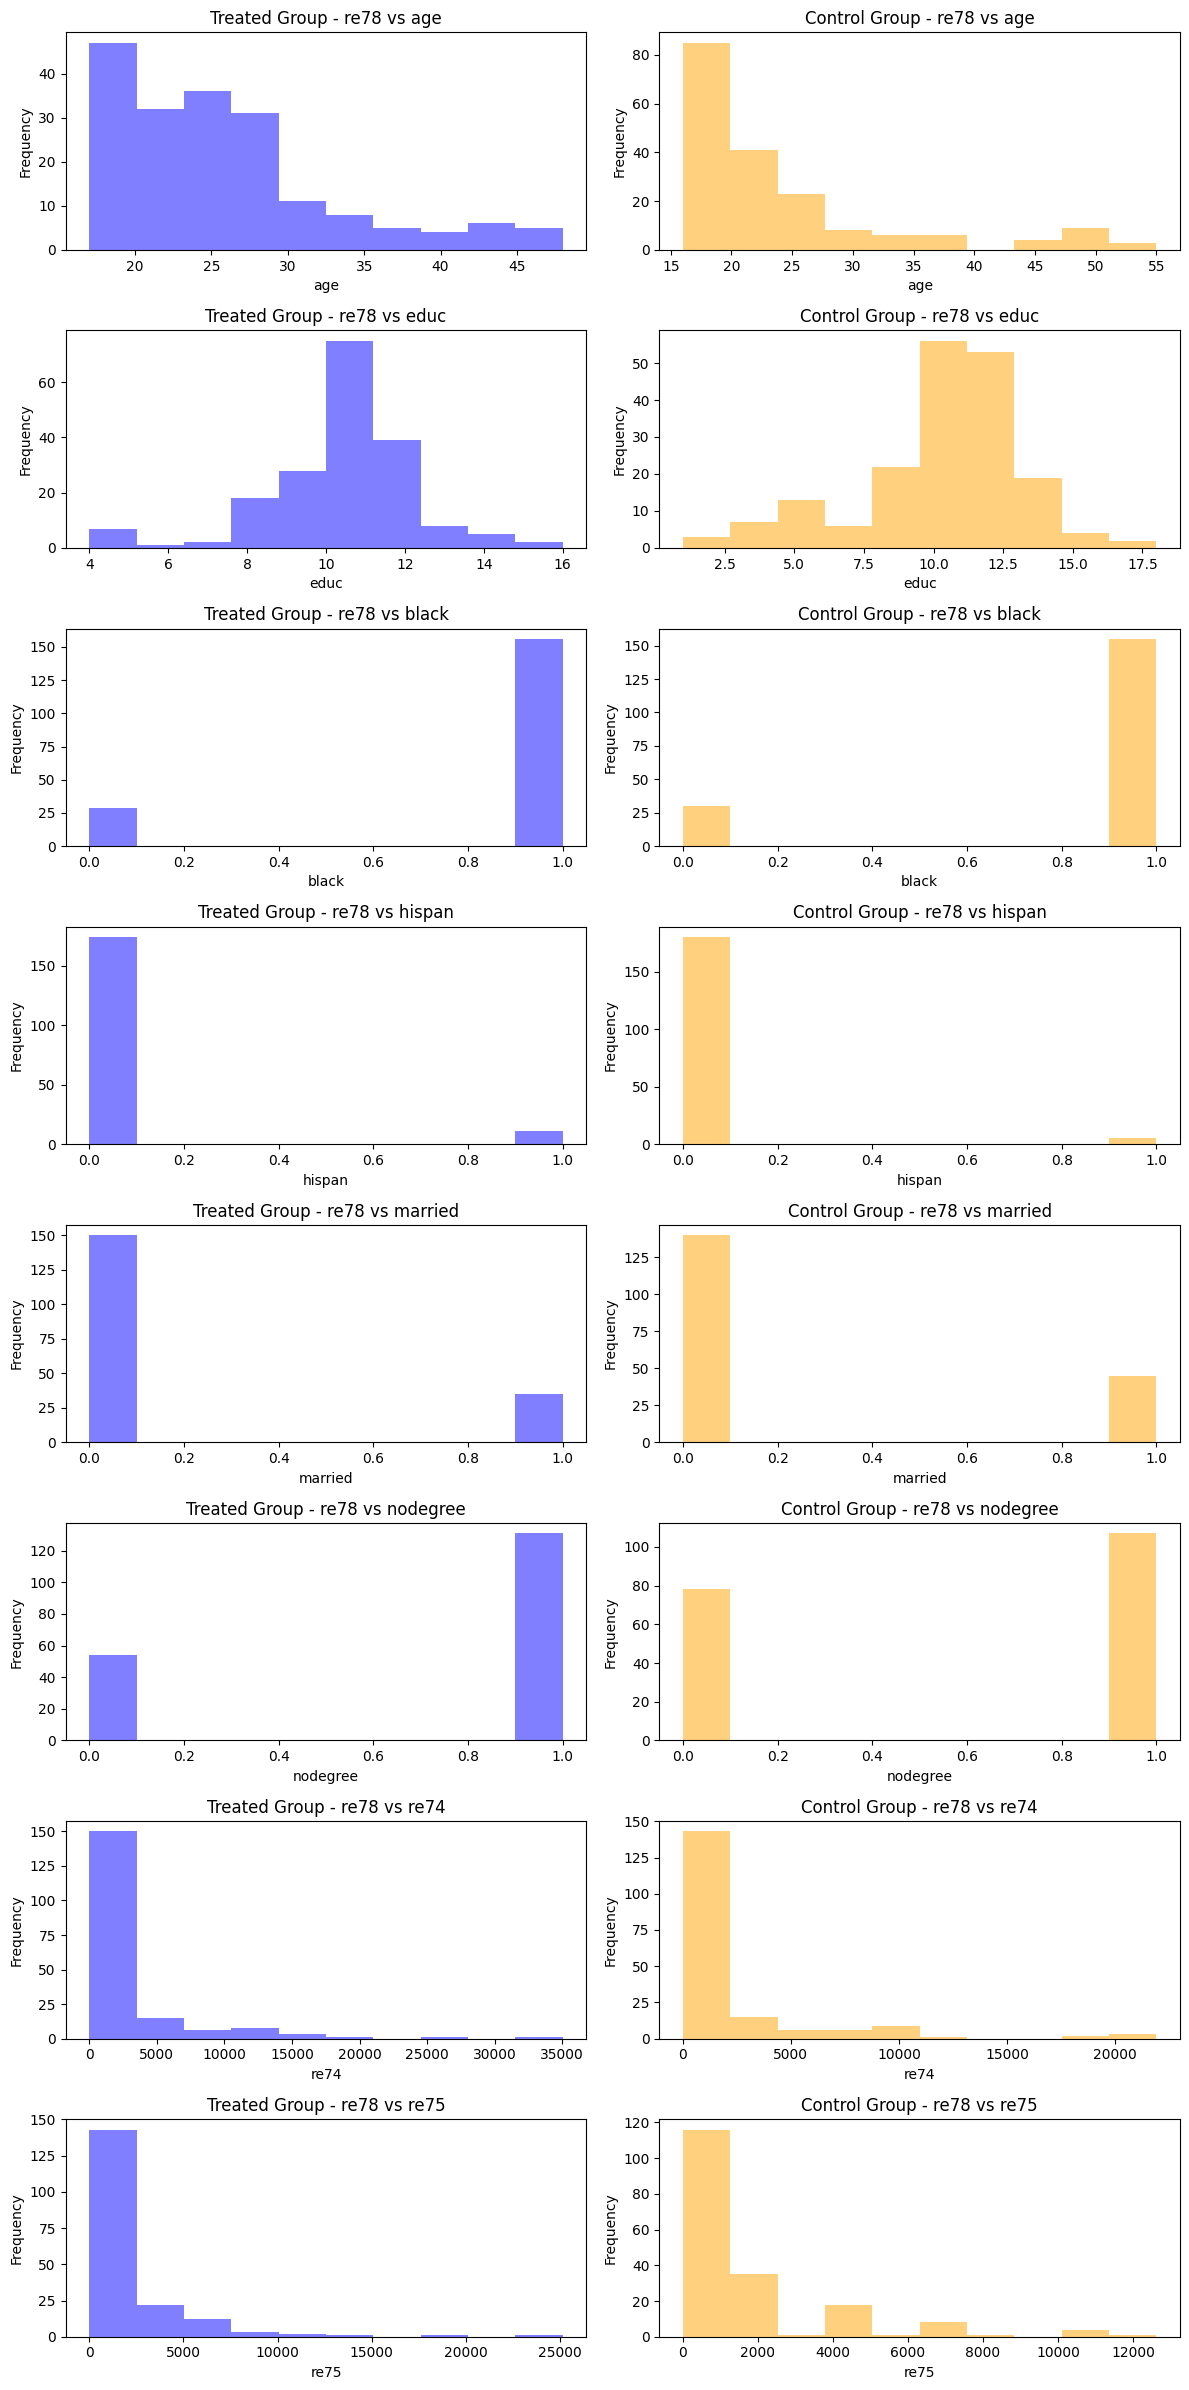

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
matched_treated = [pair[1] for pair in matched_pairs]
matched_control = [pair[0] for pair in matched_pairs]
treated_df = df.loc[matched_treated]
control_df = df.loc[matched_control]
print("Treated Group - 're78' Summary Statistics:")
print(treated_df.describe())
print("\nControl Group - 're78' Summary Statistics:")
print(control_df.describe())
features_to_compare = df.drop(['treat', 're78'], axis=1).columns.tolist()
# List of columns to plot
columns_to_plot = ['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']

# Creating subplots for treated and control groups
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(12, 24))

for idx, column in enumerate(columns_to_plot):
    # Plotting histogram for treated group
    treated_df[column].plot.hist(ax=axes[idx, 0], alpha=0.5, color='blue', title=f'Treated Group - re78 vs {column}')
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel('Frequency')

    # Plotting histogram for control group
    control_df[column].plot.hist(ax=axes[idx, 1], alpha=0.5, color='orange', title=f'Control Group - re78 vs {column}')
    axes[idx, 1].set_xlabel(column)
    axes[idx, 1].set_ylabel('Frequency')

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()


Mean re78 for Control Group before matching: count      429.000000
mean      7355.826623
std       7840.959559
min          0.000000
25%        648.722000
50%       5445.200000
75%      11600.150000
max      60307.930000
Name: re78, dtype: float64


<ipython-input-16-9990f143bb51>:29: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_matched = df.loc[matched_indices]


Mean re78 for Control Group after matching: count       80.000000
mean      7334.548493
std       9334.677061
min          0.000000
25%       1232.914750
50%       5026.931500
75%      10707.555000
max      60307.930000
Name: re78, dtype: float64


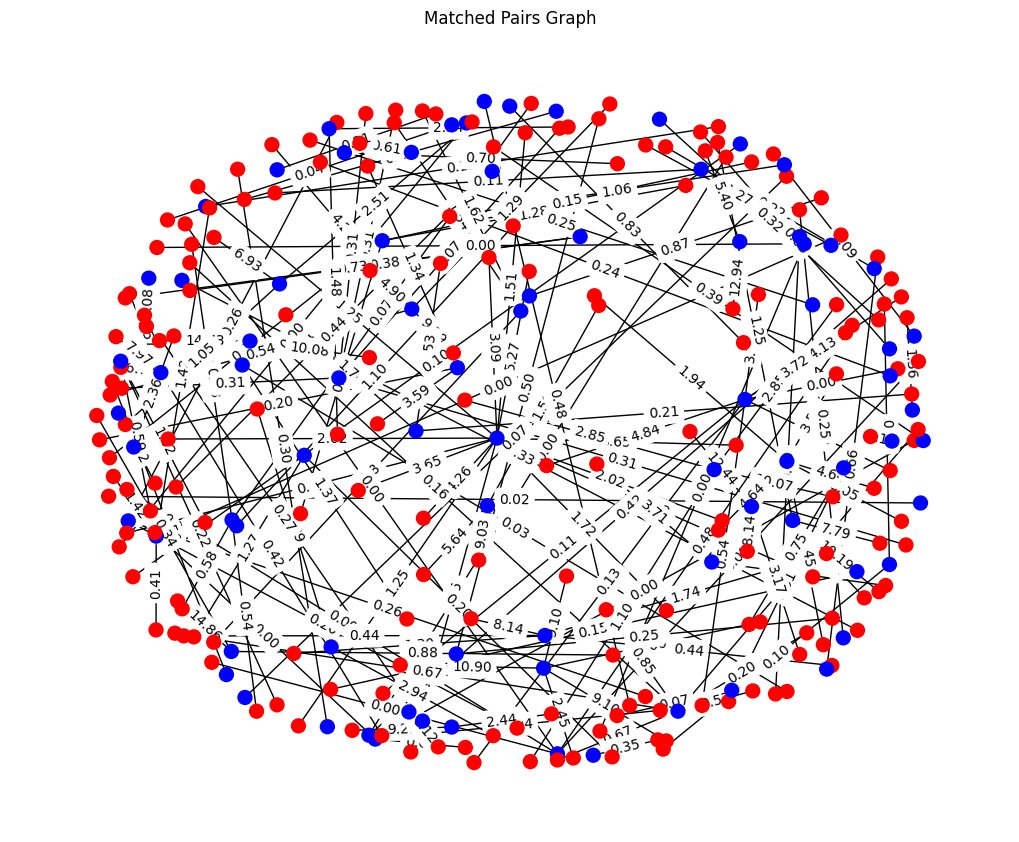

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assume df contains the DataFrame with necessary columns like 'treat', 'propensity_score', and 're78'

# Extract re78 for treated and control groups before matching
re78_treated_before = df[df['treat'] == 1]['re78']
re78_control_before = df[df['treat'] == 0]['re78']
print("Mean re78 for Control Group before matching:", re78_control_before.describe())

G = nx.Graph()
treated = df[df['treat'] == 1].index.tolist()
control = df[df['treat'] == 0].index.tolist()
G.add_nodes_from(treated, bipartite=0)
G.add_nodes_from(control, bipartite=1)

matched_pairs = []
for i in treated:
    weights_captured = []
    for j in control:
        weight = abs(df.loc[i, 'propensity_score'] - df.loc[j, 'propensity_score'])
        weights_captured.append((j, weight))
    # Add node with the lowest weight value to the graph
    min_weight_node = min(weights_captured, key=lambda x: x[1])
    matched_pairs.append((min_weight_node[0], i, min_weight_node[1]))
# Keep only matched cells in the DataFrame
matched_indices = set([control_node for control_node, _, _ in matched_pairs])
df_matched = df.loc[matched_indices]
# Update re78 values for the control group nodes with the treated group nodes' re78 values
for control_node, treated_node, _ in matched_pairs:
    df_matched.at[control_node, 're78'] = df.at[treated_node, 're78']
# Extract re78 for treated and control groups after matching
re78_treated_after = df_matched[df_matched['treat'] == 1]['re78']
re78_control_after = df_matched[df_matched['treat'] == 0]['re78']
print("Mean re78 for Control Group after matching:", re78_control_after.describe())
# Plot the graph
G_matched_pairs = nx.Graph()
for control_node, treated_node, weight in matched_pairs:
    G_matched_pairs.add_edge(control_node, treated_node, weight=weight)
pos = nx.spring_layout(G_matched_pairs)
plt.figure(figsize=(10, 8))
node_colors = ['red' if i in treated else 'blue' for i in G_matched_pairs.nodes()]
nx.draw(G_matched_pairs, pos, with_labels=False, node_size=100, node_color=node_colors)
edge_labels = {(u, v): f'{1000*w:.2f}' for u, v, w in G_matched_pairs.edges(data='weight')}
nx.draw_networkx_edge_labels(G_matched_pairs, pos, edge_labels=edge_labels)
plt.title('Matched Pairs Graph')
plt.show()


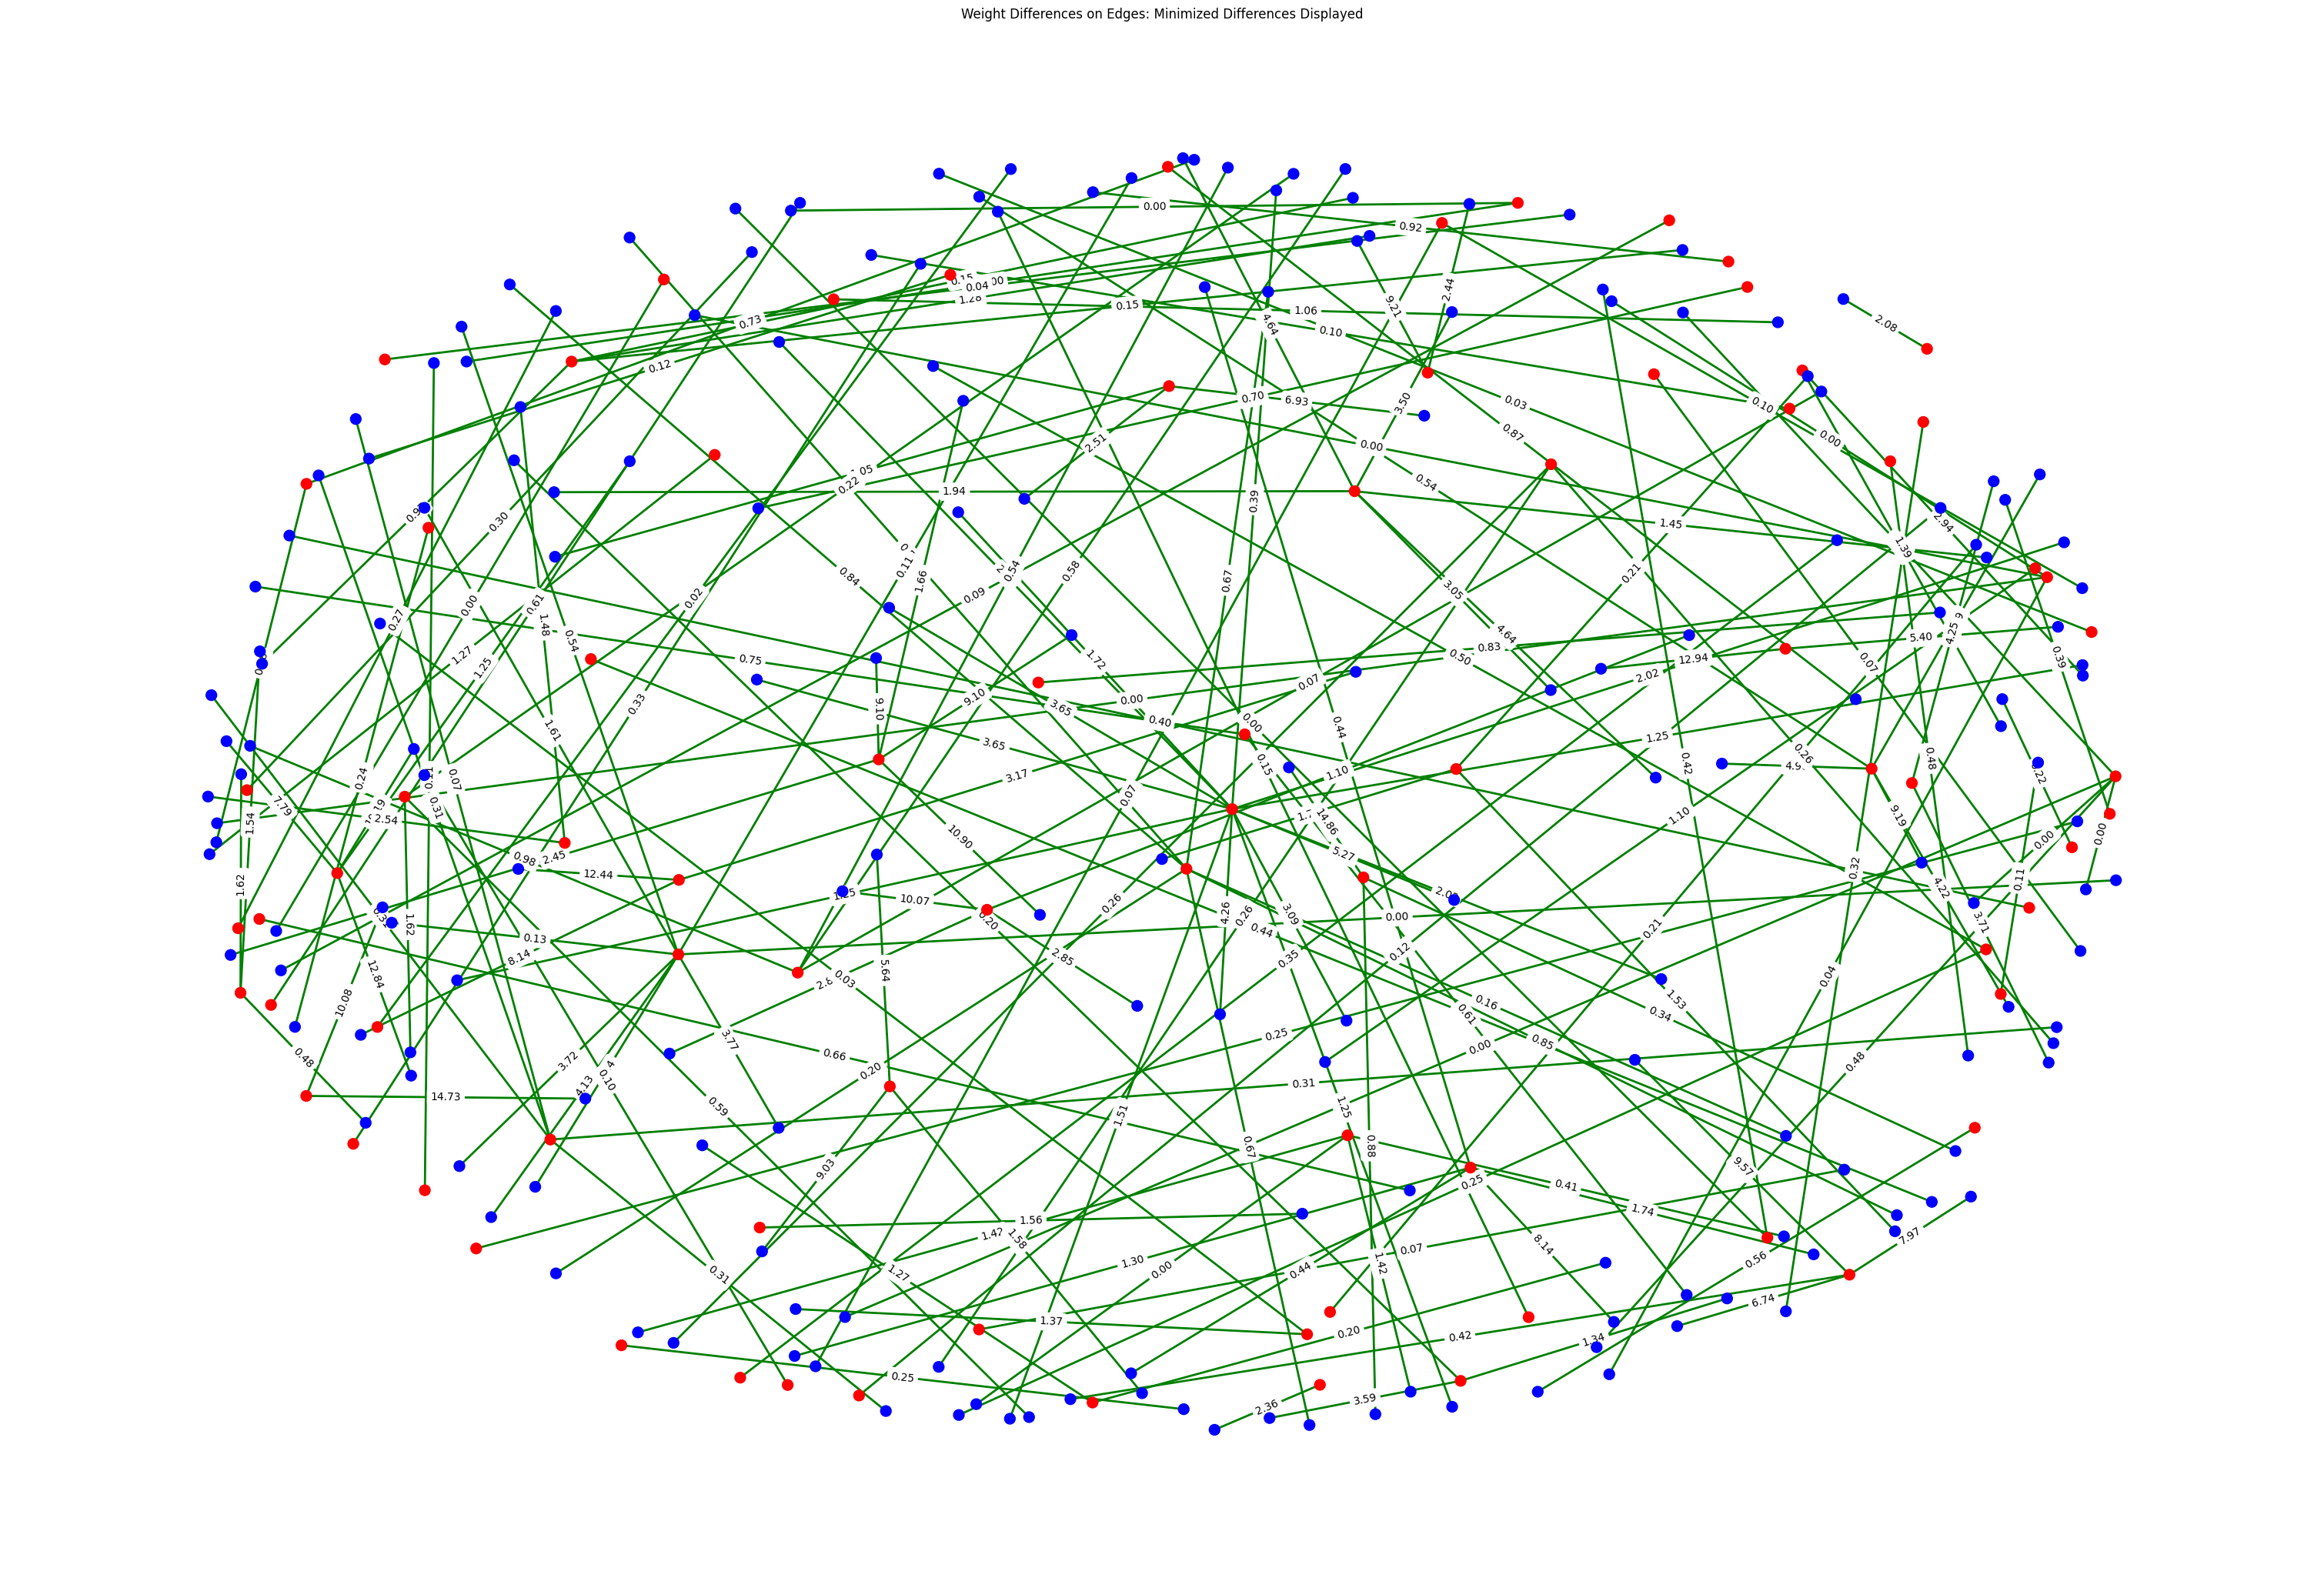

In [17]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
G_exact_match = G.copy()
G_weight_differences = nx.Graph()
for i in treated:
    min_diff = float('inf')
    min_j = None
    for j in control:
        weight = abs(df.loc[i, 'propensity_score'] - df.loc[j, 'propensity_score'])
        G_exact_match.add_edge(i, j, weight=weight)
        if weight < min_diff:
            min_diff = weight
            min_j = j
    if min_j is not None:
        G_weight_differences.add_edge(i, min_j, weight=min_diff)
pos_exact = nx.spring_layout(G_exact_match)
pos_weight_diff = nx.spring_layout(G_weight_differences)
plt.figure(figsize=(30, 20))
edge_labels = {(u, v): f'{1000*w:.2f}' for u, v, w in G_weight_differences.edges(data='weight')}
nx.draw(G_weight_differences, pos_weight_diff, with_labels=False, node_size=100,
        node_color=['blue' if i in treated else 'red' for i in G_weight_differences.nodes()])
nx.draw_networkx_edges(G_weight_differences, pos_weight_diff, edgelist=G_weight_differences.edges(), edge_color='green', width=2)
nx.draw_networkx_edge_labels(G_weight_differences, pos_weight_diff, edge_labels=edge_labels)

plt.title('Weight Differences on Edges: Minimized Differences Displayed')
plt.show()



Objective function:


\begin{align*}
\text{minimize} \sum_{(i, j) \in S} |p_i - q_j|
\end{align*}


Subject to:


\begin{align*}
&p_i - q_j \leq M \cdot (1 - x_{ij}) \\
&q_j - p_i \leq M \cdot x_{ij} \\
&x_{ij} \in \{0, 1\} \\
&p_i, q_j \text{ are propensity scores} \\
&M \text{ is a sufficiently large constant} \\
&(i, j) \in S \text{ represents all possible pairs}
\end{align*}


Explanation:

- The objective function aims to minimize the total absolute difference in propensity scores between matched pairs.
- \( p_i \) and \( q_j \) represent the propensity scores of treated and control subjects, respectively.
- \( x_{ij} \) is a binary variable that equals 1 if subjects \( p_i \) and \( q_j \) are matched, and 0 otherwise.
- The constraints enforce that the absolute difference between propensity scores \( |p_i - q_j| \) should be minimized.
- \( M \) is a sufficiently large constant that ensures the constraints hold and provides a valid matching scenario.


### 1.5 Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?  
Would you say your dataset is sufficiently balanced?  
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?  

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.  
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.



The code utilizes the Kolmogorov-Smirnov (KS) test to identify potentially problematic features by comparing the distributions of numeric features between the treated and control groups in a dataset.

Mathematically, the KS test statistic quantifies the maximum vertical deviation between the empirical cumulative distribution functions (ECDFs) of two samples. Given two samples, \(X\) and \(Y\), the KS statistic (\(D\)) is computed as:

\begin{align*}
\text{minimize} D = \max \left( \left| F_1(x) - F_2(x) \right| \right)  
\end{align*}





If the p-value is below the significance level, it implies a statistically significant difference in the distributions of that particular feature between the treated and control groups. Hence, the feature is considered potentially problematic and is appended to the `problematic_features` list.

This approach allows for automatic identification of features where the distributions between the treated and control groups significantly differ, assisting in the identification of variables that may introduce bias if not handled properly during the matching process.

In [32]:
from scipy.stats import ks_2samp

problematic_features = []
significance_level = 0.000001

for column in treated_df.columns:
    if column != 'treat' and np.issubdtype(treated_df[column].dtype, np.number):
        ks_stat, p_value = ks_2samp(treated_df[column], control_df[column])
        if p_value < significance_level:
            problematic_features.append(column)

if problematic_features:
    print("Identified problematic features:")
    print(problematic_features)
else:
    print("No problematic features found.")


Identified problematic features:
['age', 're74']


In [33]:
from scipy.stats import ks_2samp

problematic_features = []
significance_level = 0.001

for column in treated_df.columns:
    if column != 'treat' and np.issubdtype(treated_df[column].dtype, np.number):
        ks_stat, p_value = ks_2samp(treated_df[column], control_df[column])
        if p_value < significance_level:
            problematic_features.append(column)

if problematic_features:
    print("Identified problematic features:")
    print(problematic_features)
else:
    print("No problematic features found.")


Identified problematic features:
['age', 're74']


In [34]:
from scipy.stats import ks_2samp

problematic_features = []
significance_level = 0.1

for column in treated_df.columns:
    if column != 'treat' and np.issubdtype(treated_df[column].dtype, np.number):
        ks_stat, p_value = ks_2samp(treated_df[column], control_df[column])
        if p_value < significance_level:
            problematic_features.append(column)

if problematic_features:
    print("Identified problematic features:")
    print(problematic_features)
else:
    print("No problematic features found.")


Identified problematic features:
['age', 'educ', 'nodegree', 're74', 're75']


### 1.6 A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


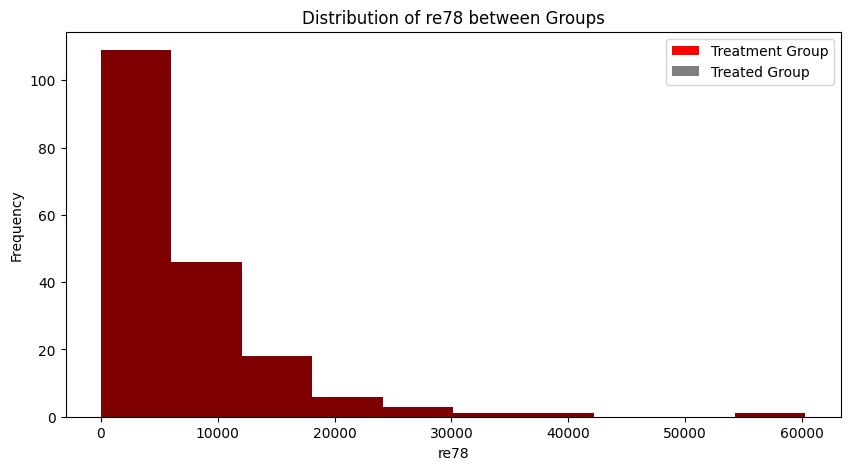

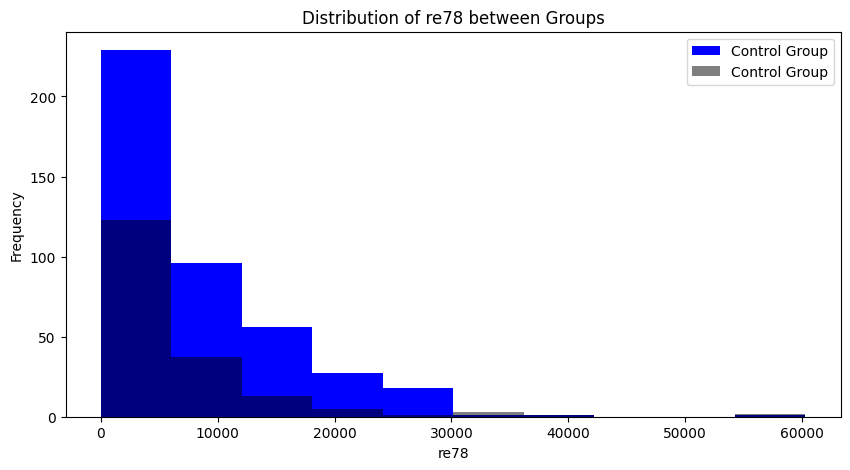


Summary statistics for re78:
Treatment Group:
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

Control Group:
count      429.000000
mean      7355.826623
std       7840.959559
min          0.000000
25%        648.722000
50%       5445.200000
75%      11600.150000
max      60307.930000
Name: re78, dtype: float64
Difference in means: 1006.6830932029216
------------------------------------------------------------------------------------------
Mean 're78' for Treated Group: 6349.143530270271
Mean 're78' for Control Group: 5999.407934054056
Difference in means: 349.7355962162155


In [44]:
treatment_group = data[data['treat'] == 1]
control_group = data[data['treat'] == 0]
features = ['re78']
titles = ['re78']
for i,feature in enumerate (features):

    plt.figure(figsize=(10, 5))
    plt.hist(treatment_group[feature], alpha=1, label='Treatment Group',color='red')
    plt.hist(treated_df['re78'], alpha=0.5, color='black', label='Treated Group')
    plt.xlabel(titles[i])
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {titles[i]} between Groups')
    plt.legend()
    plt.show()
    plt.figure(figsize=(10, 5))
    plt.hist(control_group[feature],  alpha=1, label='Control Group' ,color='blue')
    plt.hist(control_df['re78'], alpha=0.5, color='black', label='Control Group')
    plt.xlabel(titles[i])
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {titles[i]} between Groups')
    plt.legend()
    plt.show()
    print(f"\nSummary statistics for {feature}:")
    print("Treatment Group:")
    print(treatment_group[feature].describe())
    print("\nControl Group:")
    print(control_group[feature].describe())
    mean_difference = abs(treatment_group[feature].mean() - control_group[feature].mean())
    print(f"Difference in means: {mean_difference}")
    print('---'*30)





mean_re78_treated = treated_df['re78'].mean()
mean_re78_control = control_df['re78'].mean()
print(f"Mean 're78' for Treated Group: {mean_re78_treated}")
print(f"Mean 're78' for Control Group: {mean_re78_control}")
mean_difference = mean_re78_treated - mean_re78_control
print(f"Difference in means: {mean_difference}")
import matplotlib.pyplot as plt



* we observe that the differences in mean after matching decreases significantly and we can draw more meaningful conclusions from data
- we observe that since we found matches based on treatment, distribution of treatment stays the same

In [47]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(treated_df['re78'], control_df['re78'])

# Display the U-statistic and p-value
print(f"Mann-Whitney U statistic: {statistic}")
print(f"p-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("The difference in 're78' between treated and control groups is statistically significant.")
else:
    print("There may not be a statistically significant difference in 're78' between the groups.")


Mann-Whitney U statistic: 18290.5
p-value: 0.24745055881041944
There may not be a statistically significant difference in 're78' between the groups.


## 2 Applied Machine Learning with Scikit Learn

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project!  

2.1 Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency (as you will see later in the course), is of great help when it comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


In [45]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(newsgroups_data.data)
X_train, X_test_val, y_train, y_test_val = train_test_split(tfidf_features, newsgroups_data.target, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (3007, 47319)
Testing set shape: (376, 47319)
Validation set shape: (376, 47319)


2.2 Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.


Best Parameters: {'max_depth': None, 'n_estimators': 150}


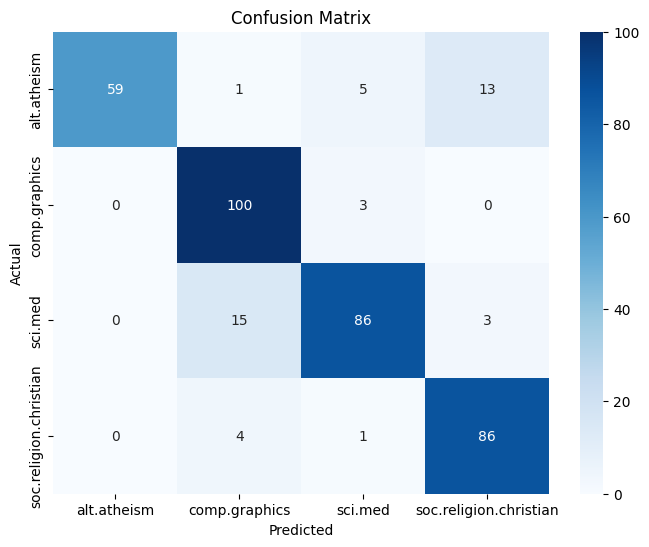

Feature Importances: [1.51677355e-04 1.74704244e-04 5.91352457e-06 ... 4.21598771e-06
 0.00000000e+00 4.28857767e-06]


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups_data.target_names, yticklabels=newsgroups_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
feature_importances = best_rf_classifier.feature_importances_
print("Feature Importances:", feature_importances)


## 3 Regression (Only Numpy, Pandas, Matplotlib Allowed)

### 3.1 Reading Data and Preprocessing

In this section, we want to read data from `regression.csv` CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [138]:

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
data = pd.read_csv('regression.csv')
print(data.head())
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

Briefly explain why we need to normalize our data before starting the training.

In [139]:
X_normalized = (X - X.mean()) / X.std()
Y_normalized = (Y - Y.mean()) / Y.std()
print((X_normalized).head())


         X1        X2        X3        X4        X5        X6      X7  \
0  2.040447 -1.784712 -0.561586 -1.469119  0.999349 -1.340767 -1.7593   
1  2.040447 -1.784712 -0.561586 -1.469119  0.999349 -0.446922 -1.7593   
2  2.040447 -1.784712 -0.561586 -1.469119  0.999349  0.446922 -1.7593   
3  2.040447 -1.784712 -0.561586 -1.469119  0.999349  1.340767 -1.7593   
4  1.284142 -1.228438  0.000000 -1.197897  0.999349 -1.340767 -1.7593   

         X8        Y1  
0 -1.813393 -0.669680  
1 -1.813393 -0.669680  
2 -1.813393 -0.669680  
3 -1.813393 -0.669680  
4 -1.813393 -0.145409  



1. **Scaling**: Normalization brings all features to a similar scale, preventing certain features from dominating due to their larger magnitudes. This is essential in machine learning algorithms that use distance-based calculations or gradient descent optimization, ensuring that no single feature has a disproportionate impact on the model.

2. **Improved Convergence**: Algorithms like gradient descent converge faster on normalized data since they don't have to take different step sizes for different features. It helps the optimization algorithm to reach the minimum loss or error more efficiently.

3. **Regularization**: Some algorithms, particularly those based on regularization (e.g., L1, L2 regularization), assume that features are centered around zero and have a comparable scale. Normalization aids in meeting these assumptions.



Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [133]:

X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

print(f"Shape of X_train_norm: {X_normalized.shape}")


Shape of X_train_norm: (768, 10)


### 3.2 Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [134]:
import numpy as np
def compute_loss(X, Y, w):
    Y_pred = np.dot(X, w)
    squared_errors = (Y_pred - Y) ** 2
    loss = np.mean(squared_errors)
    return loss


Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

What is the answer to this problem in terms of $X$ and $Y$?

The optimization problem aiming to minimize the loss function $$\mathcal{L}(w)$$ in linear regression can be solved directly using linear algebra. To find the weight vector \(w\) that minimizes the loss function, we can use the normal equation, which provides the closed-form solution.

The normal equation for linear regression is given by:

$$
w = (X^\top X)^{-1} X^\top Y
$$


Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [135]:
import numpy as np

def compute_weight_direct_method(X, Y):
    # Calculate the weight vector w using the normal equation
    w = np.linalg.inv(X.T @ X) @ X.T @ Y

    return w


Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [140]:
# Calculate the weight vector using the direct method
w = compute_weight_direct_method(X_normalized, Y_normalized)

# Calculate the loss using the computed weight vector
loss = compute_loss(X_normalized, Y_normalized, w)
print(f"Loss of the model: {loss}")

Loss of the model: 0.08851916504858287


### 3.3 Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.
Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.



The loss function in linear regression is:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

The gradient of the loss function with respect to the weight vector $$\nabla\mathcal{L}(\mathbf{w})$$ is the derivative of the loss function with respect to $$(\mathbf{w})$$.

Expressing the derivative of the loss function with respect to $$(\mathbf{w})$$ gives:

$$
\nabla\mathcal{L}(\mathbf{w}) = \frac{2}{m}X^\top(X\mathbf{w} - Y)
$$



In [141]:
import numpy as np

def compute_gradient(X, Y, w):
    m = len(Y)
    gradient = (2 / m) * X.T @ (X @ w - Y)
    return gradient


Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [142]:
import numpy as np

def gradient_descent(X, Y, learning_rate, num_iterations):
    w = np.random.randn(X.shape[1], 1)
    loss_history = []
    for i in range(num_iterations):
        gradient = compute_gradient(X, Y, w)
        w = w - learning_rate * gradient
        loss = compute_loss(X, Y, w)
        loss_history.append(loss)

    return w, np.array(loss_history)


Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure. Discuss the effect of the learning rate and find the best value of this parameter.

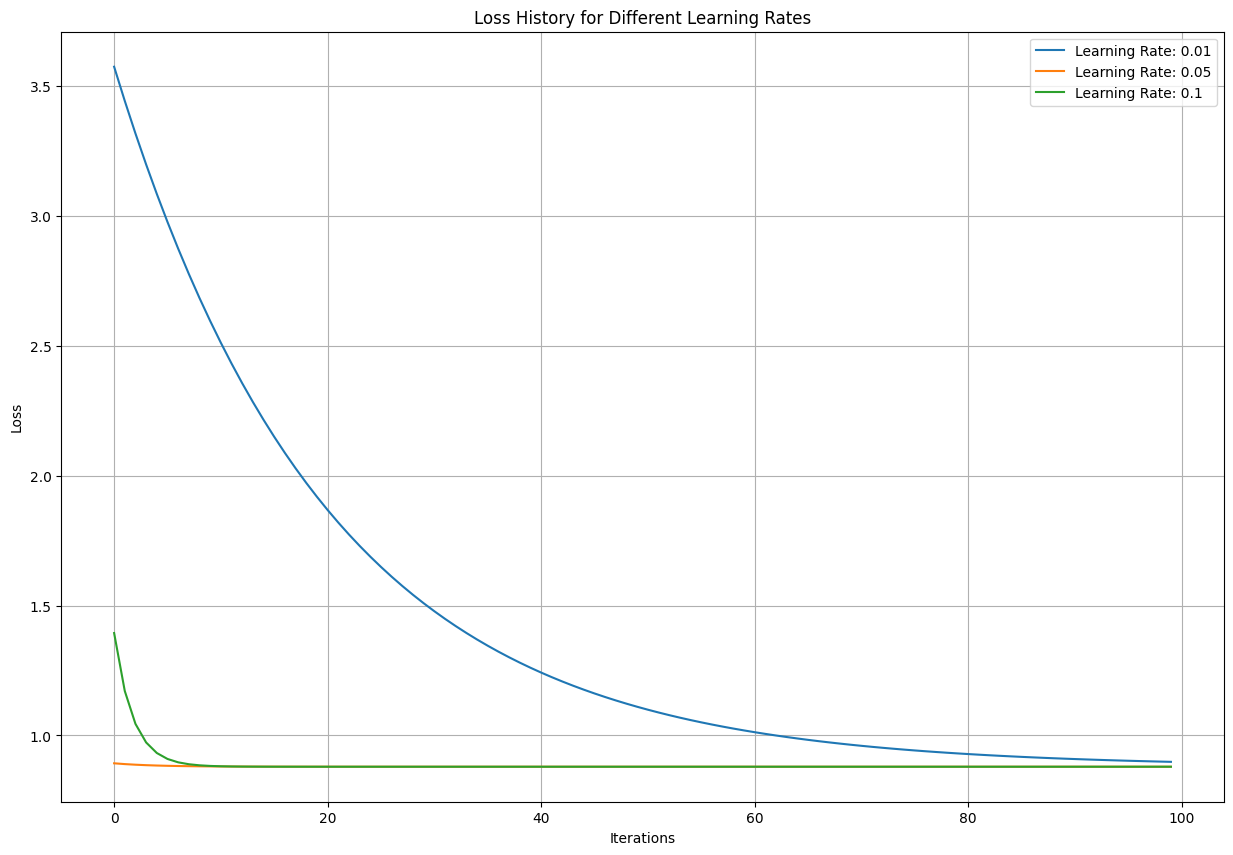

In [145]:

learning_rates = [0.01, 0.05, 0.1]
num_iterations = 100
plt.figure(figsize=(15, 10))
for lr in learning_rates:
    w_optimized, loss_history = gradient_descent(X_train, Y_train, learning_rate=lr, num_iterations=num_iterations)
    plt.plot(np.arange(num_iterations), loss_history, label=f'Learning Rate: {lr}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


### 3.4 Conclusion

Compare the answer of two different methods that we used earlier.

Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?


1. **Direct Method (Normal Equation)**:
   - **Advantages**:
     - Computationally efficient for small to medium-sized datasets.
     - Provides a closed-form solution without the need for iterations.
     - When the number of features is not extremely large, the direct method can provide an optimal solution.
   - **Disadvantages**:
     - Computationally expensive for large datasets as it involves matrix inversion, which has a complexity of O(n^3).
     - Not suitable for cases where the feature matrix is ill-conditioned or nearly singular, leading to numerical instability.

2. **Gradient Descent**:
   - **Advantages**:
     - Suitable for large datasets and high-dimensional feature spaces due to its iterative nature.
     - Flexible and adaptable to different loss functions and optimization objectives.
     - Works well even when the feature matrix is ill-conditioned or has a large number of features.
   - **Disadvantages**:
     - Convergence speed might be slower, especially for shallow local minima or saddle points.
     - Hyperparameter tuning for learning rate and iteration count is necessary.

**When to Use Each Method**:

- **Direct Method (Normal Equation)**:
  - Suitable for small to medium-sized datasets where the feature matrix can fit in memory.
  - When computational resources are sufficient and the inverse of the feature matrix exists without numerical instability.
  - For cases where an optimal solution is preferred without the need for hyperparameter tuning.

- **Gradient Descent**:
  - Preferable for large datasets where matrix inversion becomes computationally expensive.
  - When dealing with high-dimensional feature spaces or when memory constraints limit the use of the direct method.
  - In scenarios where flexibility in optimization, handling of complex loss functions, or adaptability to online learning is required.

In summary, the choice between these methods depends on the dataset size, computational resources, desired speed of convergence, and the nature of the optimization problem. The direct method is advantageous for small to medium-sized datasets with sufficient computational resources, while gradient descent is more scalable and versatile, especially for large datasets and high-dimensional spaces.

## 4 Classification (Only Numpy, Pandas, Matplotlib Allowed)
### 4.1 Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `Q4-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `Q4-valid.npy` file is your validation set, and the data in `Q4-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [146]:
import numpy as np

# Load combined data (X and Y) for training, validation, and test sets
data_train = np.load('Q4-train.npy')
data_val = np.load('Q4-valid.npy')
data_test = np.load('Q4-test.npy')

# Split the combined data into X and Y for training set
X_train, Y_train = data_train[:, :-1], data_train[:, -1]
# Split the combined data into X and Y for validation set
X_val, Y_val = data_val[:, :-1], data_val[:, -1]
# Split the combined data into X and Y for test set
X_test, Y_test = data_test[:, :-1], data_test[:, -1]


To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [147]:
import numpy as np

def create_polynomial_matrix(X, k):
    m = len(X)
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)

    polynomial_matrix = np.zeros((m, k + 1))

    for i in range(k + 1):
        polynomial_matrix[:, i] = np.power(X, i).flatten()

    return polynomial_matrix


### 4.2 Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Part 3** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [148]:
import numpy as np

def train_model(X_train, Y_train, X_val, Y_val, k):
    # Create polynomial matrix for training and validation sets
    train_matrix = create_polynomial_matrix(X_train, k)
    val_matrix = create_polynomial_matrix(X_val, k)

    # Calculate weights using the normal equation
    w = np.linalg.inv(train_matrix.T @ train_matrix) @ train_matrix.T @ Y_train

    # Calculate predictions on training and validation sets
    Y_train_pred = train_matrix @ w
    Y_val_pred = val_matrix @ w

    # Calculate mean squared error (MSE) for training and validation sets
    loss_train = np.mean((Y_train - Y_train_pred) ** 2)
    loss_val = np.mean((Y_val - Y_val_pred) ** 2)

    return loss_train, loss_val, w


In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot. Discuss about the effect of $k$.

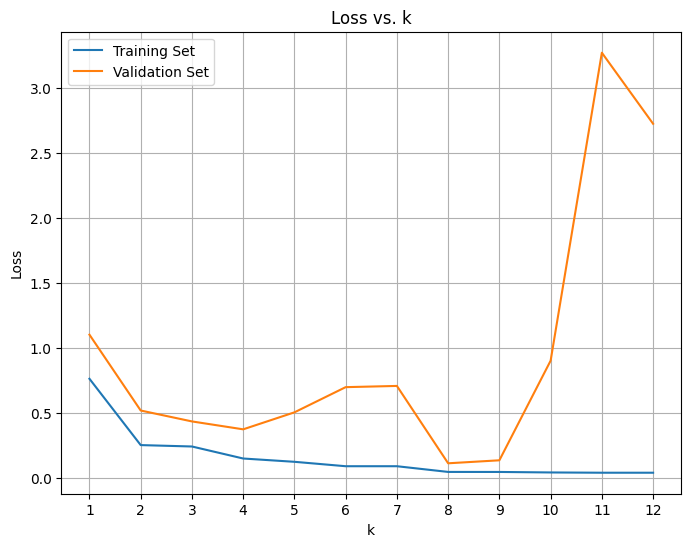

In [149]:
import matplotlib.pyplot as plt

# Define arrays to store losses
loss_train_values = []
loss_val_values = []

# Loop through different values of k
for k in range(1, 13):
    # Train the model for the current value of k
    loss_train, loss_val, _ = train_model(X_train, Y_train, X_val, Y_val, k)

    # Append losses to the respective arrays
    loss_train_values.append(loss_train)
    loss_val_values.append(loss_val)

# Plotting the losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, 13), loss_train_values, label='Training Set')
plt.plot(range(1, 13), loss_val_values, label='Validation Set')
plt.title('Loss vs. k')
plt.xlabel('k')
plt.ylabel('Loss')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()


* by increasing value of `k` model overfits so training set Loss approaches zero, but validation loss decreases and then increases again

### 4.3 Evaluating Model

In the cell below find the loss of your best model on the test set. Why we need test set?

In [150]:

k_best =  9
train_matrix = create_polynomial_matrix(X_train, k_best)
test_matrix = create_polynomial_matrix(X_test, k_best)
if train_matrix.shape[1] != len(w):
    train_matrix = train_matrix[:, :len(w)]
    test_matrix = test_matrix[:, :len(w)]
Y_test_pred = test_matrix @ w
print(Y_test,Y_test_pred)
loss_test = np.mean((Y_test - Y_test_pred) ** 2)

print(f"Loss on the test set using the best model: {loss_test}")


[ 0.43219567  0.03325962  0.28870815 -0.50234147  0.15991949  2.20617148
  0.22781921  3.27961026  0.77666871  0.83886857  0.07532852  0.33047547
  0.01450011  0.9327507   0.75238836  0.32290095  0.21803653  1.85211383
  0.20242484  0.22305293  0.16375975  0.14116947  0.65651864  0.57771818
  0.2120837  -1.14246949 -0.11212705  0.86822753  1.29452749 -0.35298957
 -0.69758844  0.88307099  0.22944119  0.38549824 -0.42373186 -0.72362674
 -0.45146655  0.67232715  0.67936865  1.2309955 ] [ -0.41029758  -1.83942367  13.46975395  -2.56375145  -2.7880708
  64.35018214  -2.01044724 143.54027389  -2.69983963  -0.74061014
  10.61958243  44.36811486  -2.81179286   0.39926426   1.44555787
  -2.14829494   2.66044668  45.33412898   1.81098785  -2.37538414
  -1.20860729  -0.76275615  -2.51711586   6.44553478  -2.30301043
   3.09705463  -2.25970622  -0.73855582 157.42334883  -1.37339081
  -1.70185685  46.21316437  16.71727289  58.54389396   2.54130734
  -1.81285789  -2.28743782  25.55478475   1.7781121

## Bonus. CAT or PERSON: Data Sources and Introduction to Pytorch
The purpose of this exercise is two-fold. First, you create an image dataset inheriting from `torch.utils.data.Dataset` by collecting images from two webpages providing AI-generated images to the public. This helps you to understand how data needed for a data science task might come from various sources other than locally stored images, structured files (like CSV), relational databases, etc. Also, people sometimes need to create their custom dataset for their research purposes. In the second part, you will train a neural network on the data using the pytorch framework.


### 5.1 Installing Pytorch

Your job for this section is to install pytorch and the torchvision library. You may normally need torchvision in this exercise when handling images for converting images to torch tensors. For the sake of practicing, it might be good to try installing the libraries directly from your notebook. However, you can also do it from your system shell. Whatever you do, please share your work and the installation success message below. If executing shell commands for installation please share the screenshot of your terminal.

In [111]:
!pip install torch torchvision


In [113]:
import torch
import torchvision
# Check PyTorch version
print(torch.__version__)

# Check torchvision version
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


### 5.2 Dataset
Take a look at [this interesting webpage](https://thisxdoesnotexist.com/) which shares AI-generated images and have some fun first! Well, we want to collect a dataset consisting of 50 images from [this url](https://thispersondoesnotexist.com/image) created by Phillip Wang and 50 images from [this one](https://thiscatdoesnotexist.com) created by Ryan Hoover.
For creating the dataset you must inherit from `torch.utils.data.Dataset` and name your custom dataset class as `collected_2class_Dataset`

The `__init__()`, `__len__()` and `__getitem__()` methods of the class must be rewritten by you properly.

The dataset must be designed in a way that by instantiation of the class, the data collection starts until all the samples are gathered. Your `__getitem__()` should also be coded in a way that `__getitem__(idx)` returns the data sample with the index `idx`. More precisely if your instance of `collected_2class_Dataset` is named `DS` and if:

`img, label = DS.__getitem__(someIndex)`, Then:

* `img` should be a torch tensor of size [1, 784] with data type float. The values must represent the scaled (to [0,1]) pixel values of the grayscale version of the images after being resized to 28x28.  
* `label` should be a torch tensor of a single element with data type long taking the value of 0 if the image is for a person and 1 if the image is related to a cat.

You might need to use additional packages like [Pillow](https://pypi.org/project/Pillow/) for image operations. Also, for requesting images from the websites you can follow different approaches. The simplest one might be running proper curl commands as shell commands from inside your python code. Use the following URLs for each resource to GET the images:
* https://thispersondoesnotexist.com/image
* https://thiscatdoesnotexist.com

Write code for your Dataset class definition and also any auxiliary functions if applicable. Please instantiate your class at the end of this code section.

In [172]:
import requests
from PIL import Image
import torchvision.transforms as transforms
import torch
from torch.utils.data import Dataset
from io import BytesIO
from tqdm import tqdm  # Import tqdm for progress visualization
import pprint  # Import pprint for pretty printing exceptions

class Collected2ClassDataset(Dataset):
    def __init__(self):
        self.data = []  # Initialize an empty list to store (image, label) tuples

        # Fetch images for persons
        for _ in tqdm(range(50), desc='Fetching images for persons'):  # tqdm for progress tracking
            response = requests.get('https://thispersondoesnotexist.com/', headers={'User-Agent': 'Mozilla/5.0'})
            image_content = BytesIO(response.content)
            try:
                image = Image.open(image_content)
                # Preprocess the image (resize, convert to grayscale, normalize)
                transform = transforms.Compose([
                    transforms.Resize((28, 28)),
                    transforms.Grayscale(num_output_channels=1),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5,), (0.5,))
                ])
                image = transform(image)
                self.data.append((image, torch.tensor(0, dtype=torch.long)))  # Append (image, label) tuple
            except Exception as e:
                pprint.pprint(f"Failed to process image for person: {e}")  # pprint to format exceptions

        # Fetch images for cats
        for _ in tqdm(range(50), desc='Fetching images for cats'):  # tqdm for progress tracking
            response = requests.get('https://thiscatdoesnotexist.com', headers={'User-Agent': 'Mozilla/5.0'}, verify=False)
            image_content = BytesIO(response.content)
            try:
                image = Image.open(image_content)
                # Preprocess the image (resize, convert to grayscale, normalize)
                transform = transforms.Compose([
                    transforms.Resize((28, 28)),
                    transforms.Grayscale(num_output_channels=1),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5,), (0.5,))
                ])
                image = transform(image)
                self.data.append((image, torch.tensor(1, dtype=torch.long)))  # Append (image, label) tuple
            except Exception as e:
                pprint.pprint(f"Failed to process image for cat: {e}")  # pprint to format exceptions

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Instantiate the dataset
custom_dataset = Collected2ClassDataset()


Fetching images for cats:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thiscatdoesnotexist.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thiscatdoesnotexist.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'thiscatdoesnotexist.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warni

TooManyRedirects: ignored

**Unfortunately, the API address you provided is temporarily down (Exceeded 30 redirects error)**

In [159]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from urllib.parse import urljoin

# URL to fetch content from
url = 'https://thesecatsdonotexist.com'

# Fetch HTML content from the URL
response = requests.get(url)
if response.status_code == 200:
    # Parse HTML content
    soup = BeautifulSoup(response.content, 'html.parser')
    print(soup)
    # Extract image URLs
    image_urls = []
    print(image_urls)
    div_elements = soup.find_all('div', class_='column')
    for div in div_elements:
        img_elements = div.find_all('img')
        for img in img_elements:
            img_url = img.get('src')
            if img_url:
                full_url = urljoin(url, img_url)
                image_urls.append(full_url)

    # Download and plot 10 cat images
    num_images_to_plot = 10
    for idx, img_url in enumerate(image_urls[:num_images_to_plot], start=1):
        response_img = requests.get(img_url)
        if response_img.status_code == 200:
            # Download image
            with open(f'cat_image_{idx}.jpg', 'wb') as f:
                f.write(response_img.content)
                print(f"Downloaded cat image {idx}")

            # Plot the downloaded image
            img = plt.imread(f'cat_image_{idx}.jpg')
            plt.subplot(2, 5, idx)
            plt.imshow(img)
            plt.axis('off')

        else:
            print(f"Failed to download cat image {idx}")

    # Show the plotted images
    plt.tight_layout()
    plt.show()

else:
    print(f"Failed to fetch content from {url}")


<!DOCTYPE html>

<html>
<head>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style>
        * {
            box-sizing: border-box;
        }

        body {
            margin: 0;
            font-family: Arial;
        }

        .header {
            text-align: center;
            padding: 32px;
        }

        .row {
            display: -ms-flexbox;
            /* IE10 */
            display: flex;
            -ms-flex-wrap: wrap;
            /* IE10 */
            flex-wrap: wrap;
            padding: 0 4px;
        }

        /* Create four equal columns that sits next to each other */
        .column {
            -ms-flex: 12.5%;
            /* IE10 */
            flex: 12.5%;
            max-width: 12.5%;
            padding: 0 4px;
        }

        .column img {
            margin-top: 8px;
            vertical-align: middle;
        }

        /* Responsive layout - makes a two column-layout instead of four columns */
        @media only scree

<Figure size 640x480 with 0 Axes>

**in our second try you observe website `thesecatsdonotexist` that masks image url from web parser**

In [166]:
ACCESS_KEY = "PQJX8zaTsWBITUMXzCkNJNnURME1ghzlpgSlGnEE1jw"
import requests
from PIL import Image
import torchvision.transforms as transforms
import torch
from torch.utils.data import Dataset
from io import BytesIO
from tqdm import tqdm
import pprint

class Collected2ClassDataset(Dataset):
    def __init__(self):
        self.data = []  # Initialize an empty list to store (image, label) tuples

        # Fetch images for persons
        for _ in tqdm(range(50), desc='Fetching images for persons'):
            response = requests.get('https://thispersondoesnotexist.com/', headers={'User-Agent': 'Mozilla/5.0'})
            image_content = BytesIO(response.content)
            try:
                image = Image.open(image_content)
                transform = transforms.Compose([
                    transforms.Resize((28, 28)),
                    transforms.Grayscale(num_output_channels=1),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5,), (0.5,))
                ])
                image = transform(image)
                self.data.append((image, torch.tensor(0, dtype=torch.long)))
            except Exception as e:
                pprint.pprint(f"Failed to process image for person: {e}")

        # Fetch images for cats
        access_key = "PQJX8zaTsWBITUMXzCkNJNnURME1ghzlpgSlGnEE1jw"  # Replace with your actual access key
        headers = {'Authorization': f'Client-ID {access_key}'}
        for _ in tqdm(range(50), desc='Fetching images for cats'):
            response = requests.get('https://api.unsplash.com/photos/random?query=cat', headers=headers)
            if response.status_code == 200:
                cat_image_url = response.json()['urls']['regular']
                cat_response = requests.get(cat_image_url, verify=False)
                image_content = BytesIO(cat_response.content)
                try:
                    image = Image.open(image_content)
                    transform = transforms.Compose([
                        transforms.Resize((28, 28)),
                        transforms.Grayscale(num_output_channels=1),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,))
                    ])
                    image = transform(image)
                    self.data.append((image, torch.tensor(1, dtype=torch.long)))
                except Exception as e:
                    pprint.pprint(f"Failed to process image for cat: {e}")
            else:
                print(f"Failed to fetch cat image: {response.status_code}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Instantiate the modified dataset
custom_dataset = Collected2ClassDataset()


Fetching images for cats:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.unsplash.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Fetching images for cats:   2%|▏         | 1/50 [00:00<00:18,  2.63it/s]/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.unsplash.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Fetching images for cats:   4%|▍         | 2/50 [00:01<00:30,  1.56it/s]/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.unsplash.co

Failed to fetch cat image: 403
Failed to fetch cat image: 403


Fetching images for cats:  96%|█████████▌| 48/50 [00:17<00:00,  4.15it/s]

Failed to fetch cat image: 403
Failed to fetch cat image: 403


Fetching images for cats: 100%|██████████| 50/50 [00:17<00:00,  2.83it/s]

Failed to fetch cat image: 403
Failed to fetch cat image: 403


### 5.3 Dataloader
Using `torch.utils.data.random_split` split your dataset to train/test with the proportion of 70/30. Based on `torch.utils.data.DataLoader` create a DataLoader for train data and one for test data. The choice of the batch size is up to you, but try to use rational values.

In [167]:
import torch
from torch.utils.data import DataLoader, random_split

# Assuming custom_dataset contains your combined dataset

# Define the sizes for train and test sets
dataset_size = len(custom_dataset)
train_size = int(0.7 * dataset_size)
test_size = dataset_size - train_size

# Split the dataset into train and test sets
train_dataset, test_dataset = random_split(custom_dataset, [train_size, test_size])

# Define batch sizes for train and test DataLoader
train_batch_size = 16
test_batch_size = 8

# Create DataLoader instances for train and test sets
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)


### 5.4 Training a Neural Network Classifier
Inheriting from `torch.nn.Module` create a neural network for classifying the input images to person/cat. Use 2 hidden layers. Employ relu as the non-linearity (activation function) for the both hidden layers and sigmoid for the output. The choice of the number of nodes in the hidden layers is up to you. Train your network with the `torch.nn.CrossEntropyLoss` loss as objective function and use `torch.optim.Adam` as optimizer. Use 10 epochs of learning. Report the accuracy of classification at the end of each learning epoch by printing the values.

Epoch 1/10: 100%|██████████| 5/5 [00:00<00:00, 62.86it/s]


Epoch 1/10 - Loss: 0.6769 - Accuracy: 63.08%


Epoch 2/10: 100%|██████████| 5/5 [00:00<00:00, 109.64it/s]


Epoch 2/10 - Loss: 0.5818 - Accuracy: 80.00%


Epoch 3/10: 100%|██████████| 5/5 [00:00<00:00, 96.45it/s]


Epoch 3/10 - Loss: 0.6131 - Accuracy: 84.62%


Epoch 4/10: 100%|██████████| 5/5 [00:00<00:00, 163.21it/s]


Epoch 4/10 - Loss: 0.4868 - Accuracy: 87.69%


Epoch 5/10: 100%|██████████| 5/5 [00:00<00:00, 135.62it/s]


Epoch 5/10 - Loss: 0.4564 - Accuracy: 92.31%


Epoch 6/10: 100%|██████████| 5/5 [00:00<00:00, 149.42it/s]


Epoch 6/10 - Loss: 0.4014 - Accuracy: 93.85%


Epoch 7/10: 100%|██████████| 5/5 [00:00<00:00, 108.63it/s]


Epoch 7/10 - Loss: 0.4175 - Accuracy: 96.92%


Epoch 8/10: 100%|██████████| 5/5 [00:00<00:00, 121.97it/s]


Epoch 8/10 - Loss: 0.3557 - Accuracy: 98.46%


Epoch 9/10: 100%|██████████| 5/5 [00:00<00:00, 116.36it/s]


Epoch 9/10 - Loss: 0.3426 - Accuracy: 100.00%


Epoch 10/10: 100%|██████████| 5/5 [00:00<00:00, 102.19it/s]


Epoch 10/10 - Loss: 0.3465 - Accuracy: 100.00%
Training finished


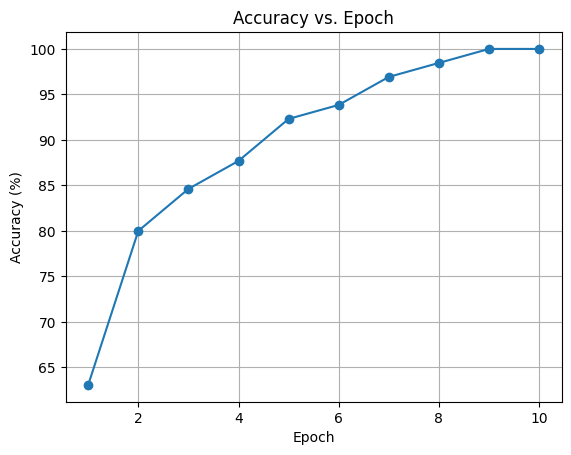

Training finished


In [171]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Define the neural network architecture
class ClassifierNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ClassifierNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Set the input size, hidden layer sizes, and output size
input_size = 28 * 28  # Assuming input images are 28x28 pixels
hidden_size1 = 128
hidden_size2 = 64
output_size = 2  # 2 classes: person and cat

# Create an instance of the classifier
model = ClassifierNN(input_size, hidden_size1, hidden_size2, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Set the number of epochs
num_epochs = 10

# Store accuracy values for plotting
accuracies = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    accuracies.append(epoch_accuracy)  # Store accuracy for the epoch

    print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.2f}%")

print('Training finished')

# Plotting accuracy vs. epoch
plt.plot(range(1, num_epochs + 1), accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epoch')
plt.grid(True)
plt.show()
print('Training finished')


### 5.5 Testing the Trained Model
Examine the accuracy of your trained model on the test data prepared in section 3-5 and report the result.

In [169]:
# Assuming you have a DataLoader for the test data named 'test_loader'
correct = 0
total = 0
model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Accuracy on test data: {test_accuracy:.2f}%")


Accuracy on test data: 89.66%


- as you can see we achieved `89.66%` accuracy on test set and `100%` accuracy on training set which tells that our model is too simple - overfits

### 5.6 Is it Really Difficult to Distinguish Cats from Humans?
Can you propose a rather simple rule-based system for doing this classification task? No code is needed for this part, just explain your ideas.



While a rule-based system might not achieve the same level of accuracy as a trained neural network, a basic rule-based approach could involve:

1. **Color Analysis**: Cats and humans often have different dominant colors in images. Cats commonly have fur colors like orange, black, white, etc., while humans might have a broader range of colors in clothing, skin, and hair.
   
2. **Texture and Patterns**: Analyzing texture and patterns could be useful. Cats may have fur patterns like stripes, spots, or solid color patches, which might differ significantly from human clothing textures or skin textures.

3. **Features and Proportions**: The presence of specific features like whiskers, ears, tails, and distinctive facial structures might hint at a cat in an image. Conversely, human features like eyes, noses, and mouths are different and might be used to identify humans.

4. **Contextual Clues**: Analyzing the context of the image might help. For instance, if the image contains objects like pet toys, cat trees, or scratching posts, it's more likely to contain a cat. Conversely, if it contains items like chairs, tables, or vehicles, it might be more inclined towards humans.

5. **Machine Learning-based Feature Extraction**: Although it's not a purely rule-based approach, utilizing pre-trained models or feature extraction techniques from machine learning algorithms (like edge detection, SIFT, or HOG features) might assist in distinguishing between cats and humans based on different image features.

These rules can be combined and weighted to create a simple classification system. However, it's important to note that while this approach might work in some cases, it may not be robust enough to handle the diversity and complexity present in real-world images. This approach will likely lack the generalization capabilities of a trained neural network model and might not perform well in all scenarios.